In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
os.mkdir("data_hybrids_uniform")
os.mkdir("data_hybrids_fixed")

# Generate the Data

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
test = pd.DataFrame(data=np.ravel(y_test), columns=['y'])
train = pd.DataFrame(data=np.ravel(y_train), columns=['y'])

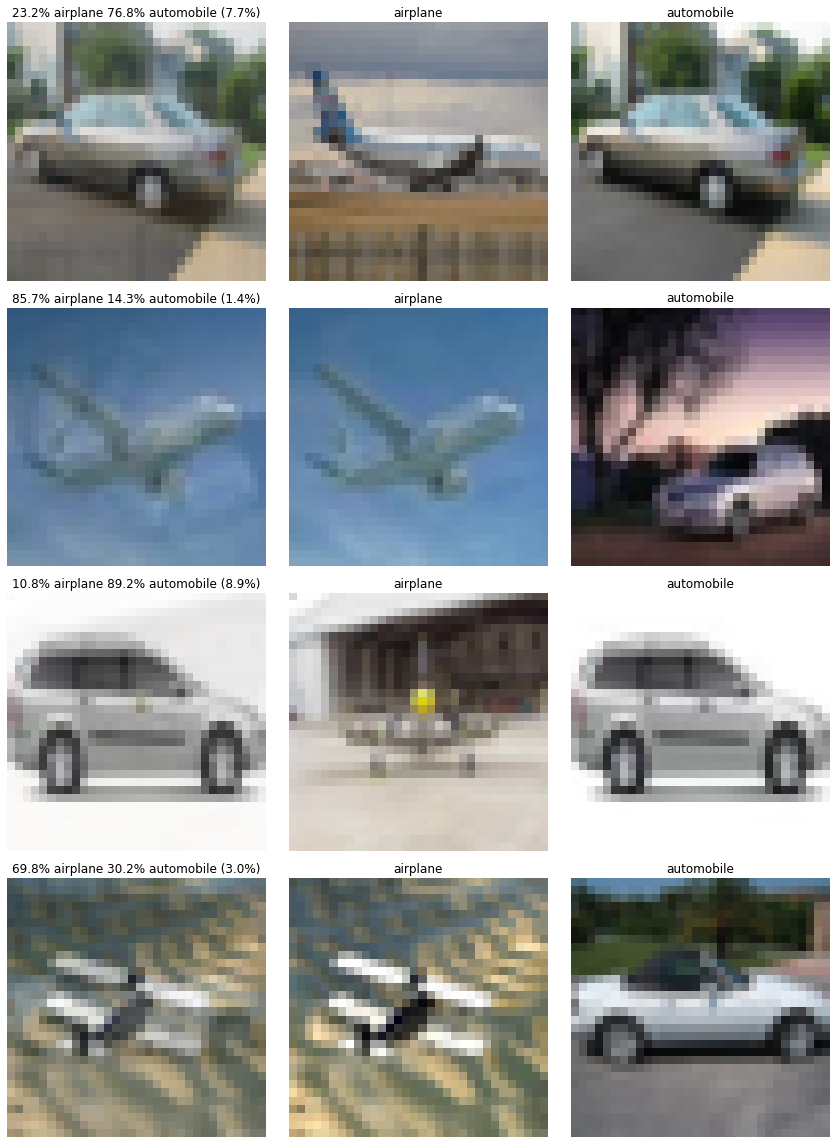

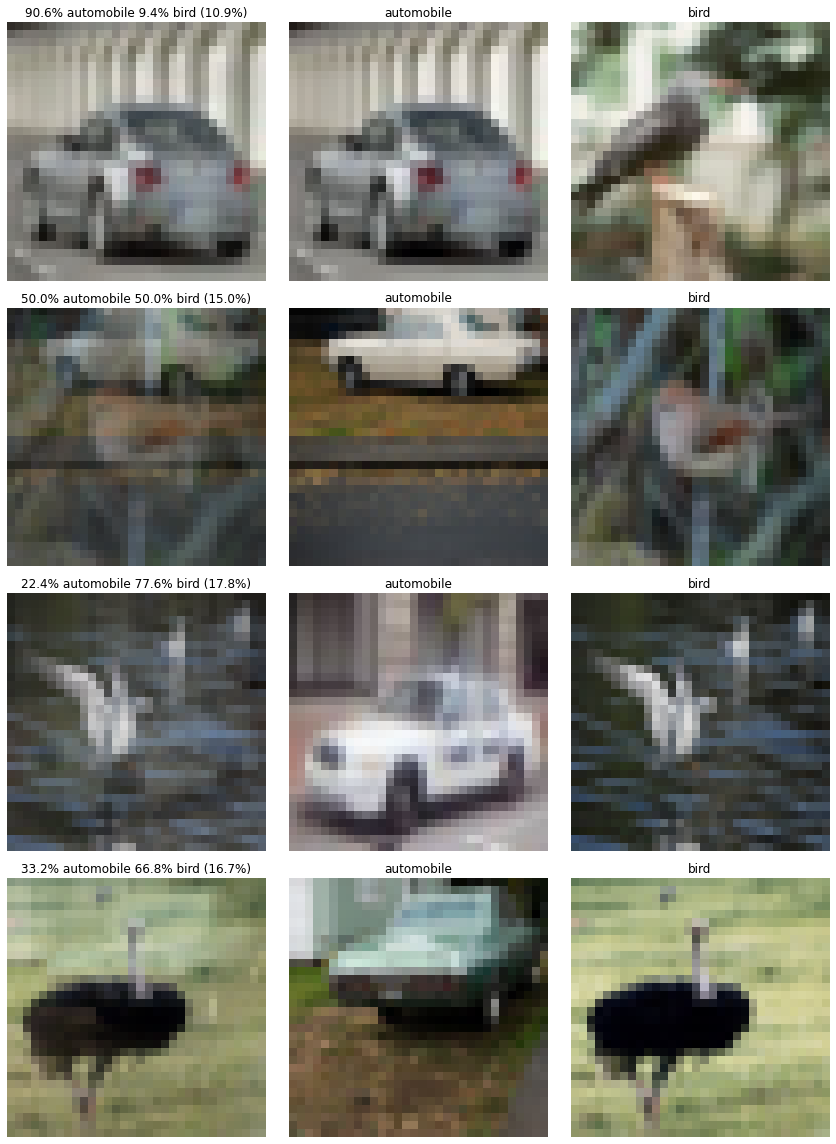

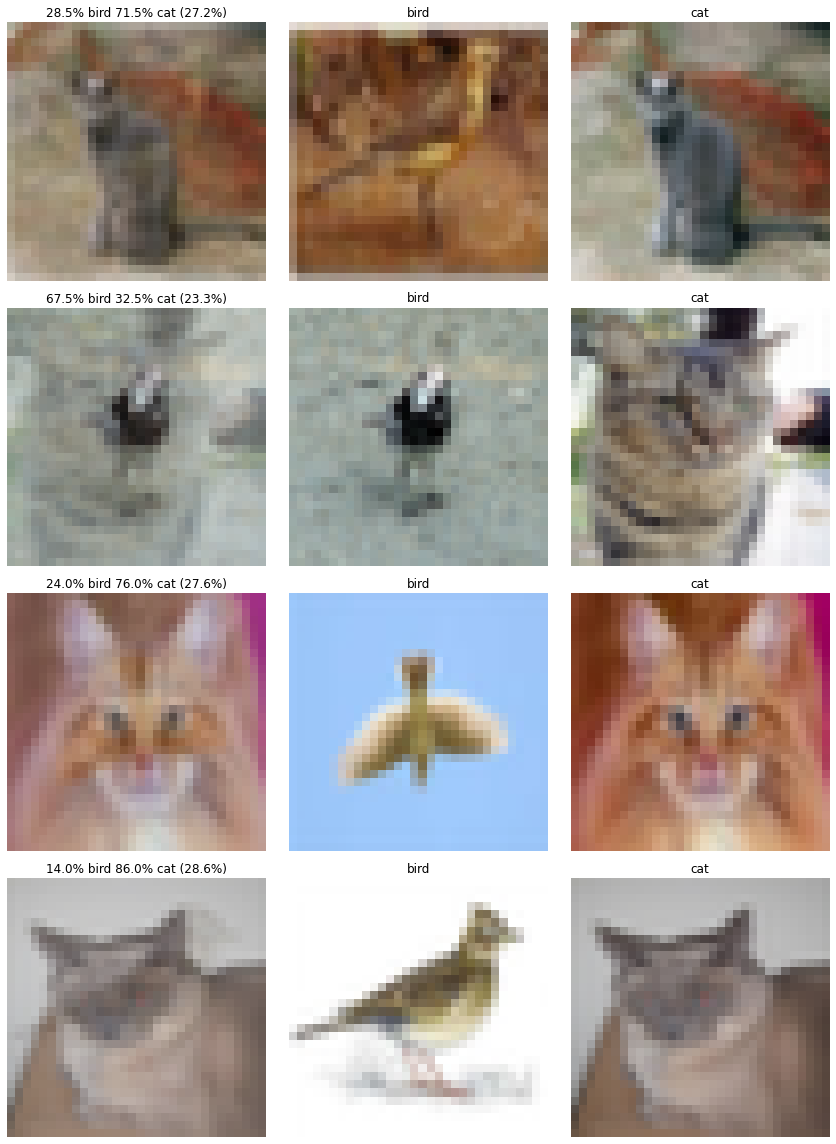

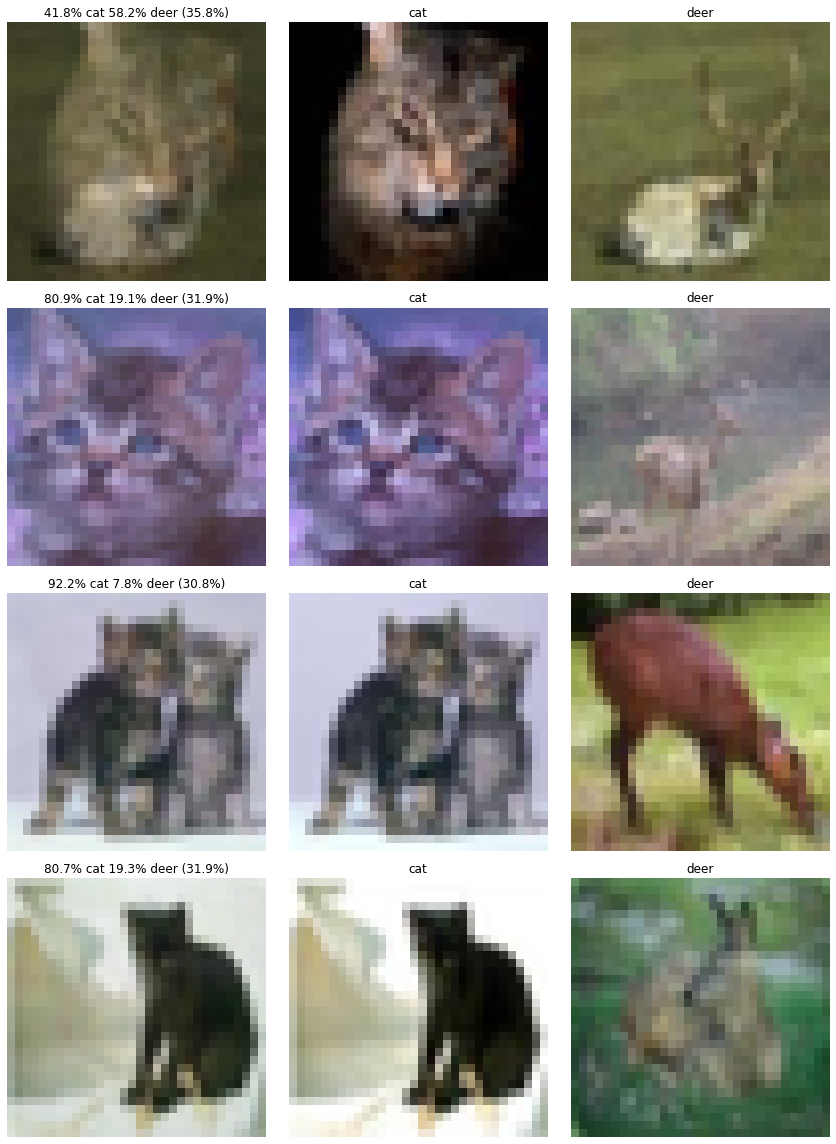

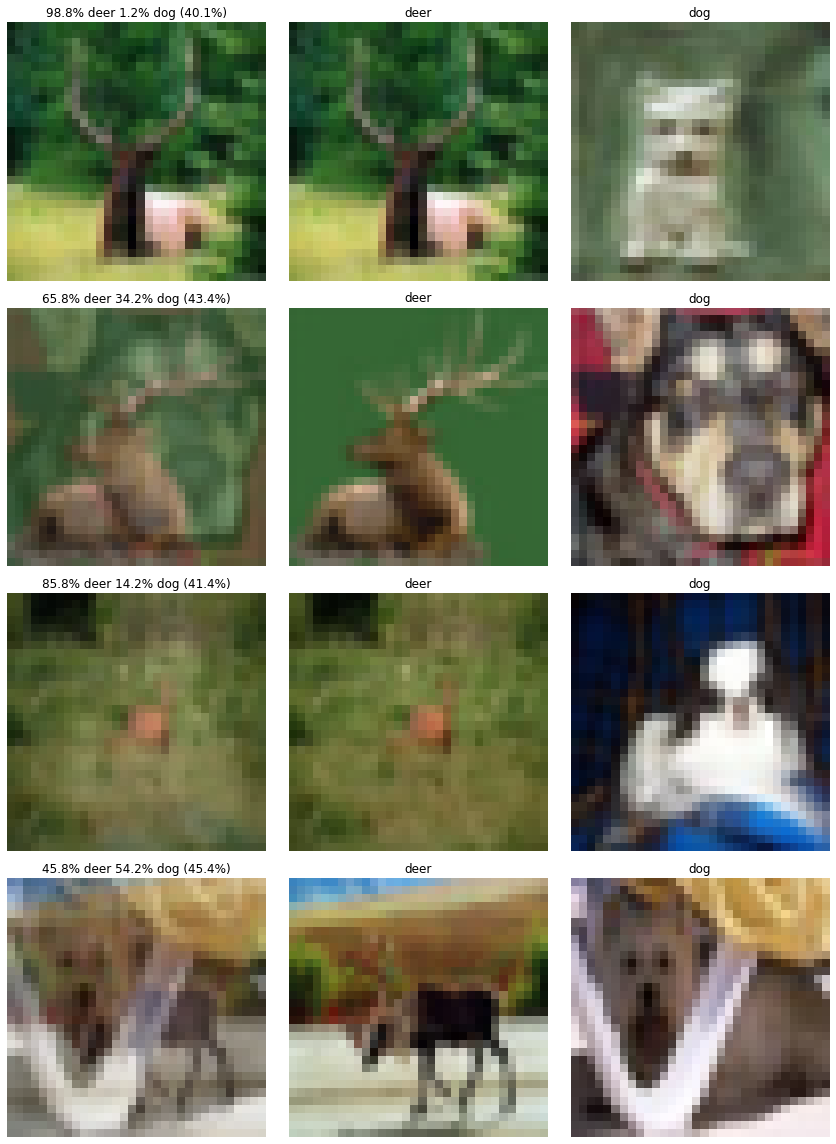

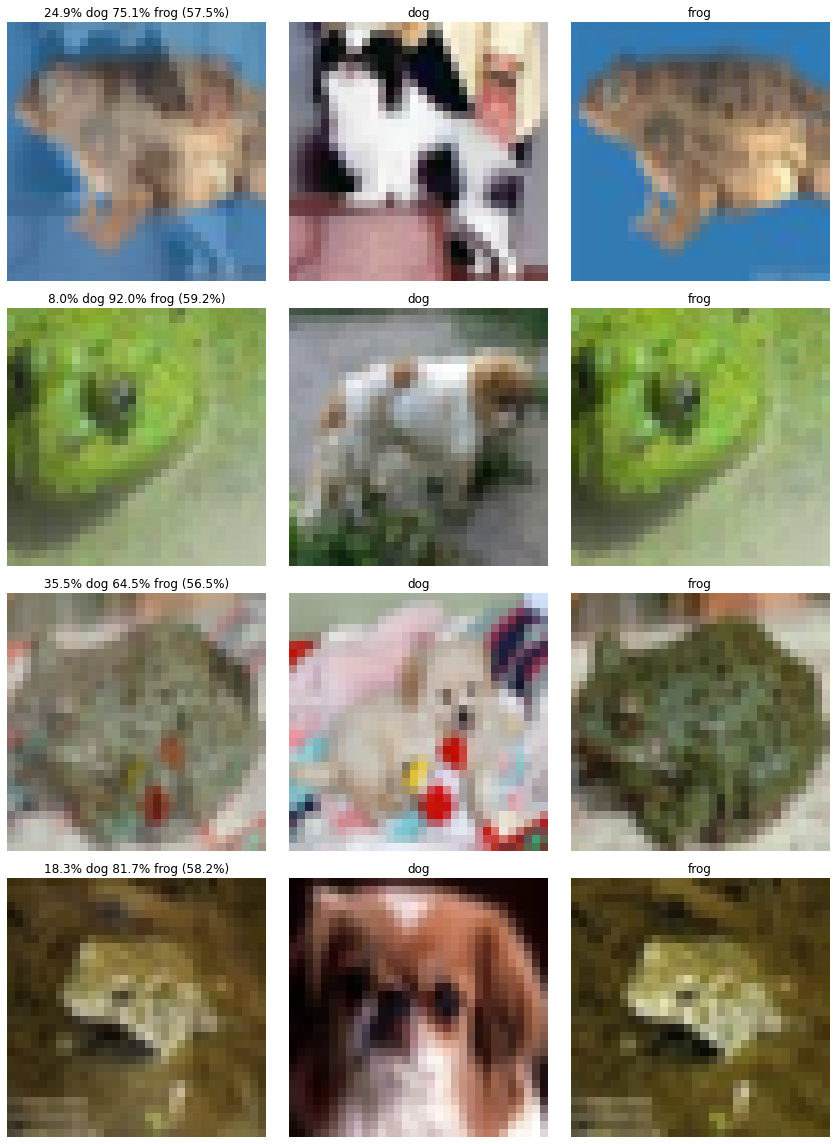

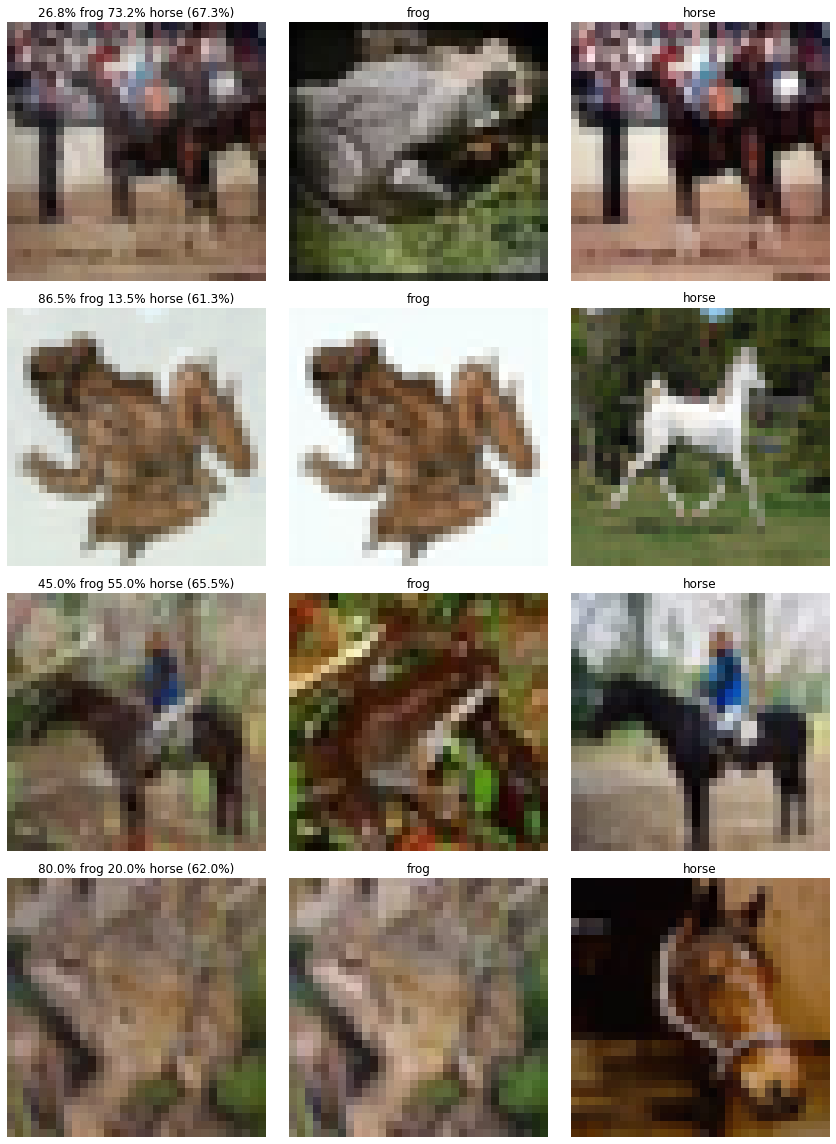

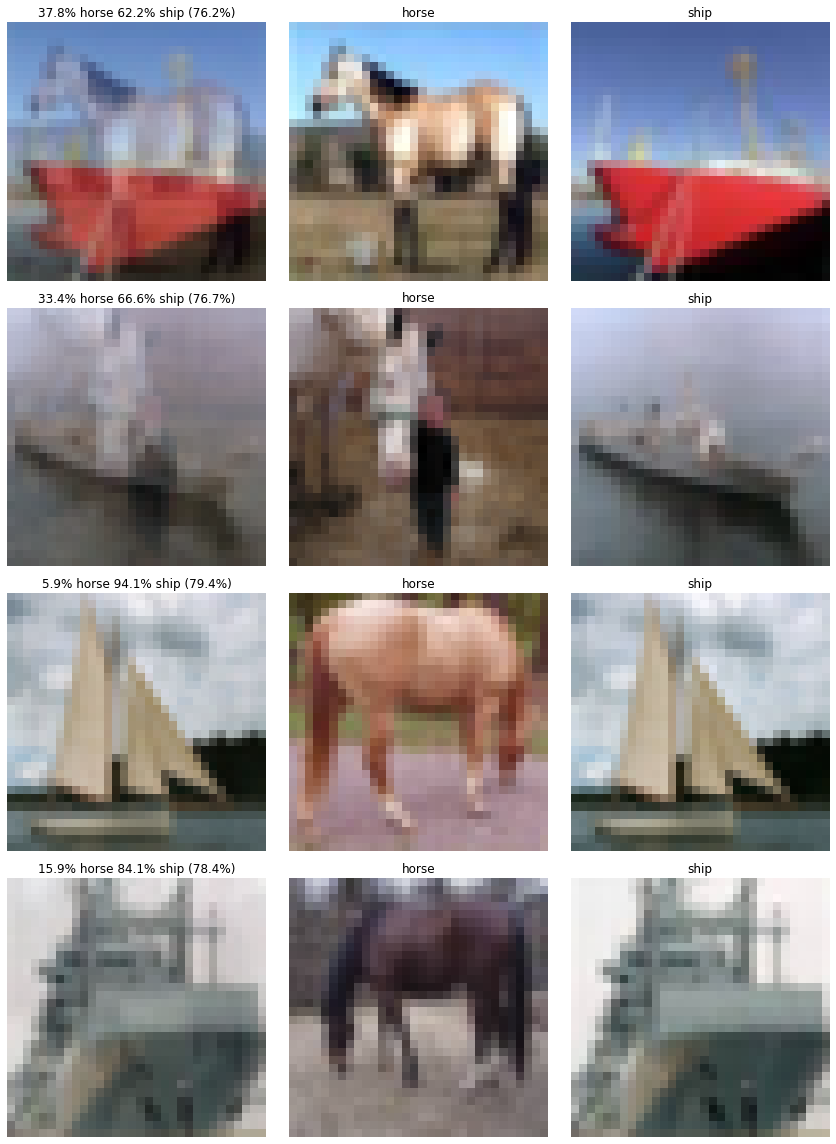

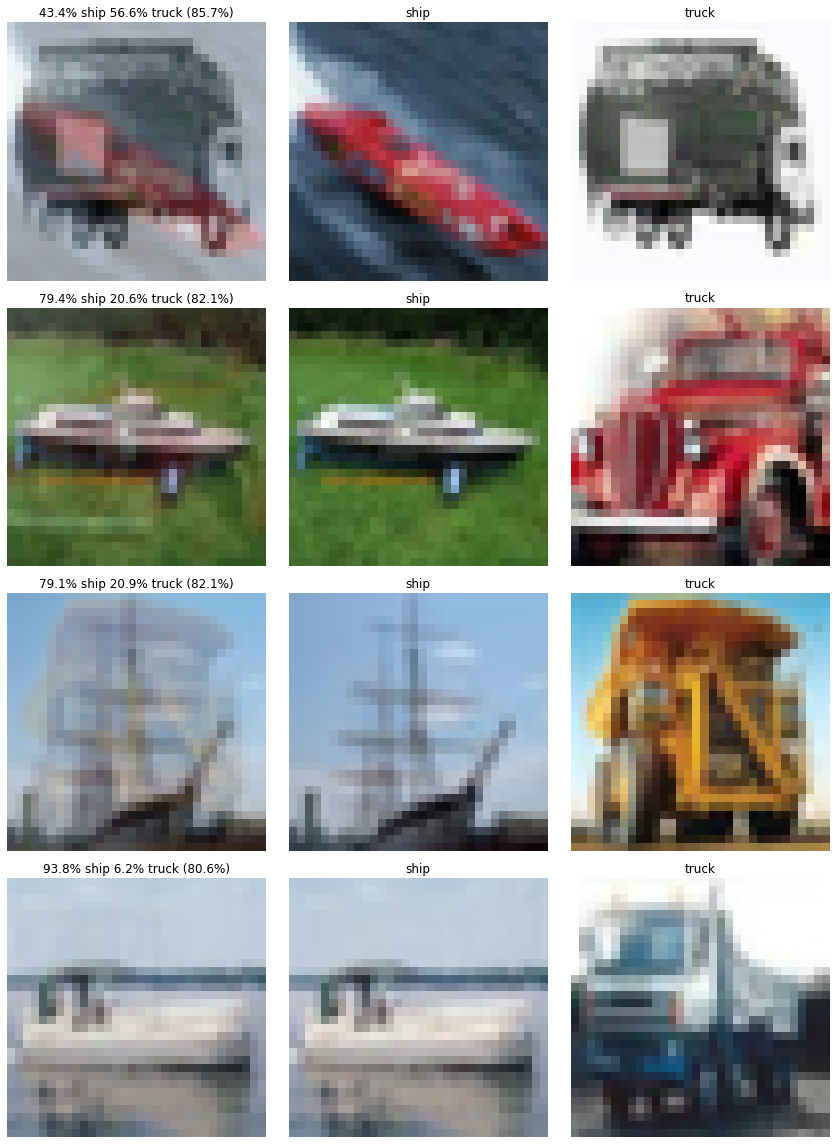

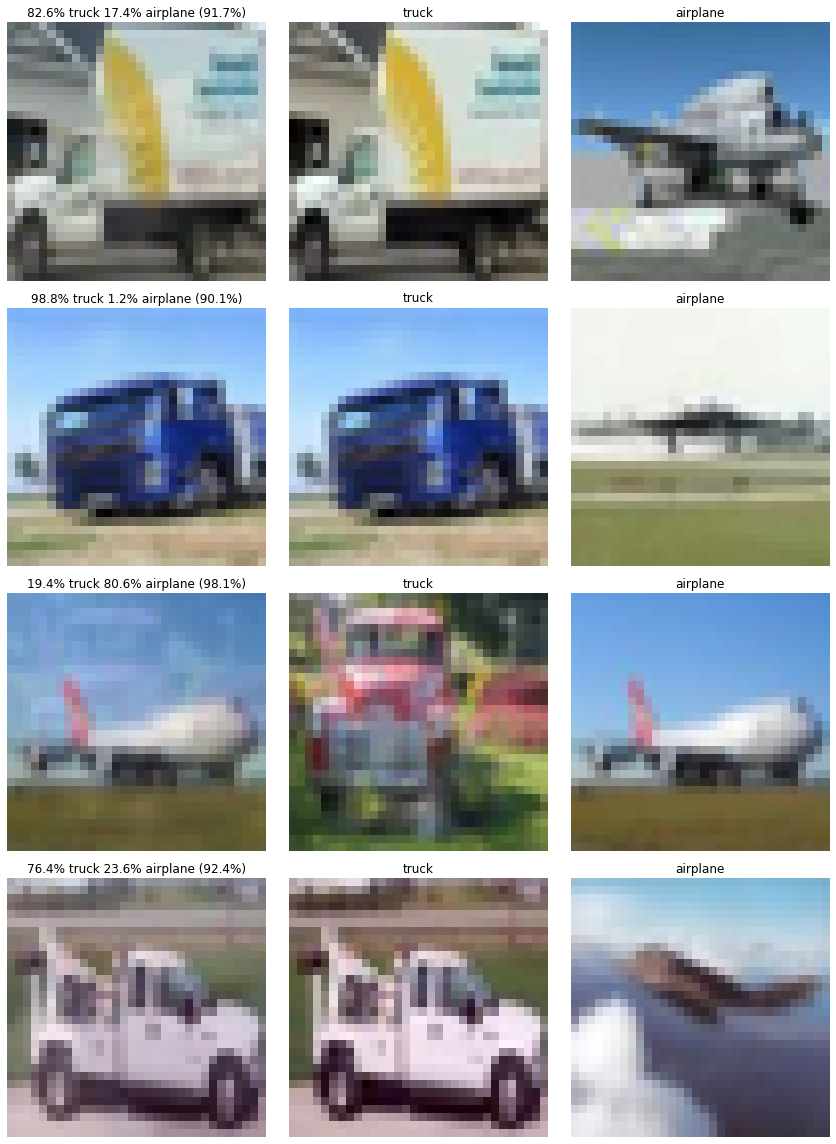

In [5]:
n = 500
images_arr = np.empty((n * 10, 32, 32, 3))
labels_arr = np.empty(n * 10)
images_arr_pure = np.empty((n * 10, 32, 32, 3))
labels_arr_pure = np.empty(n * 10)
original_labels = [None] * n * 10
original_labels_pure = [None] * n * 10
n_disp = 4

for i in range(10):
    indices_1 = train[train['y'] == i].index.to_numpy()
    indices_2 = train[train['y'] == (i + 1) % 10].index.to_numpy()
    
    # Get the pure ones
    images_arr_pure[i * n : (i + 1) * n] = x_train[indices_1[:n]]
    labels_arr_pure[i * n : (i + 1) * n] = np.ones(n) * i / 10.
    original_labels_pure[i * n : (i + 1) * n] = [str(i) + "_1"] * n

    # Remove the first n
    indices_1 = indices_1[n:]
    indices_2 = indices_2[n:]

    # Randomly sample n of the indices 
    indices_1 = np.random.choice(indices_1, size=n, replace=True)
    indices_2 = np.random.choice(indices_2, size=n, replace=True)

    # Generate n lambdas
    hybrids = np.random.uniform(size=n)
    lambdas = [[k] for k in hybrids]
    lambdas = np.tile(lambdas, (32 * 32 * 3)).reshape(n, 32, 32, 3)

    # Compute the probabilities 
    probs = (lambdas * i + (1 - lambdas) * (i + 1) % 10) / 10.

    # Create the hybrids 
    images = x_train[indices_1] * lambdas + x_train[indices_2] * (1 - lambdas)

    # Append images and labels to array
    images_arr[i * n : (i + 1) * n] = images
    labels_arr[i * n : (i + 1) * n] = [probs[k, 0, 0, 0] for k in range(len(probs))]
    for k in range(n):
        original_labels[i * n + k] = str(i) + "_" + str(hybrids[k])
        
    # Display the images
    fig, ax = plt.subplots(nrows=n_disp, ncols=3, figsize=(4*3, 4 * n_disp))
    for i_disp in range(n_disp):
        ax[i_disp, 0].imshow(images[i_disp] /255.)
        ax[i_disp, 0].set_title(str(round(round(lambdas[i_disp, 0, 0, 0], 3) * 100, 3)) + "% " + labels[i] + " " \
                        + str(round(100 - round(lambdas[i_disp, 0, 0, 0], 3) * 100, 3)) + "% " + labels[(i + 1) % 10] + " (" + \
                           str(round(100 * round(probs[i_disp, 0, 0, 0], 3), 3)) + "%)")
        ax[i_disp, 1].imshow(x_train[indices_1[i_disp]])
        ax[i_disp, 1].set_title(labels[i])
        ax[i_disp, 2].imshow(x_train[indices_2[i_disp]])
        ax[i_disp, 2].set_title(labels[(i + 1) % 10])
        for j in range(3):
            ax[i_disp, j].axis('off')
        assert(probs[i_disp, 0, 0, 0] == labels_arr[i * n + i_disp])
    plt.tight_layout()
    plt.show()

    
# Do sampling and converting to one-hot
samples_arr = np.random.binomial(1, labels_arr)
samples_arr = tf.keras.utils.to_categorical(samples_arr, num_classes=2)
categorical_labels_arr = np.empty((len(labels_arr), 2))
categorical_labels_arr[:, 1] = labels_arr
categorical_labels_arr[:, 0] = 1 - labels_arr

samples_arr_pure = np.random.binomial(1, labels_arr_pure)
samples_arr_pure = tf.keras.utils.to_categorical(samples_arr_pure, num_classes=2)
categorical_labels_arr_pure = np.empty((len(labels_arr_pure), 2))
categorical_labels_arr_pure[:, 1] = labels_arr_pure
categorical_labels_arr_pure[:, 0] = 1 - labels_arr_pure

# Concatenate
images_arr = np.concatenate((images_arr, images_arr_pure))
categorical_labels_arr = np.concatenate((categorical_labels_arr, categorical_labels_arr_pure))
samples_arr = np.concatenate((samples_arr, samples_arr_pure))
original_labels = np.concatenate((original_labels, original_labels_pure))

# Save
np.save("data_hybrids_uniform/train_images.npy", images_arr)
np.save("data_hybrids_uniform/train_probs.npy", categorical_labels_arr)
np.save("data_hybrids_uniform/train_labels.npy", samples_arr)
np.save("data_hybrids_uniform/train_original_labels.npy", original_labels)

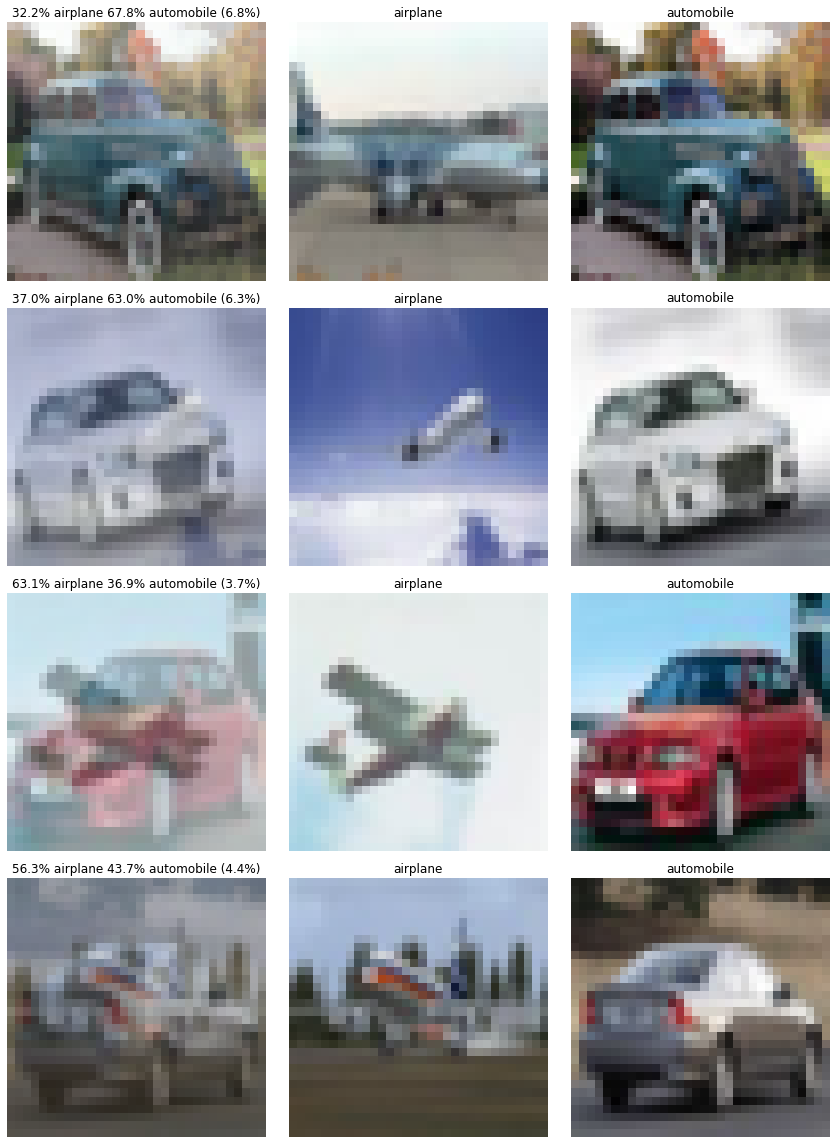

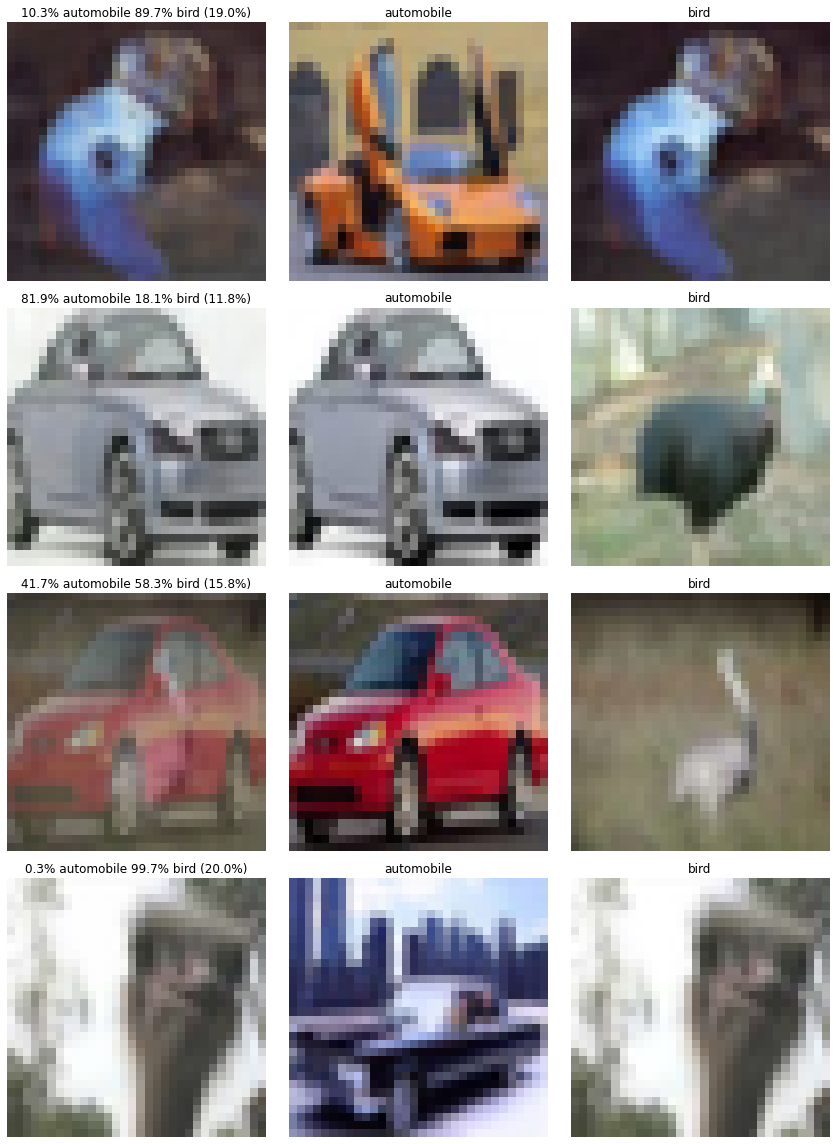

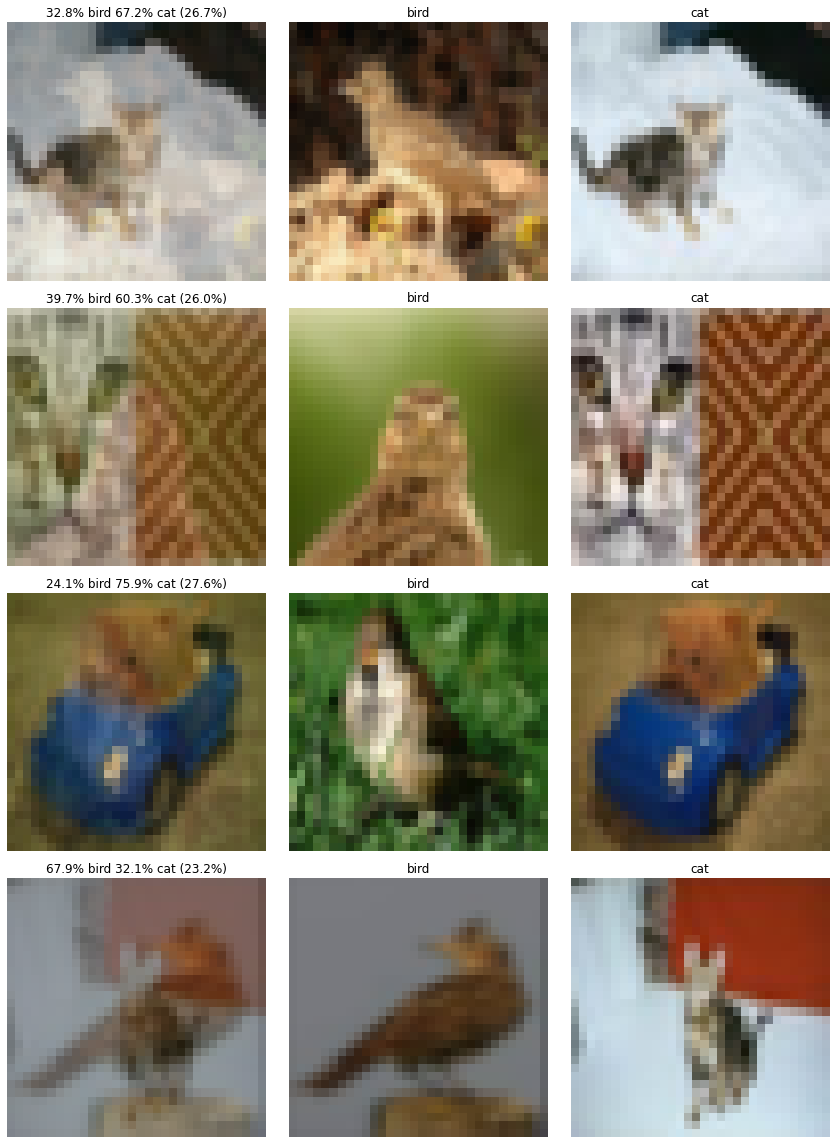

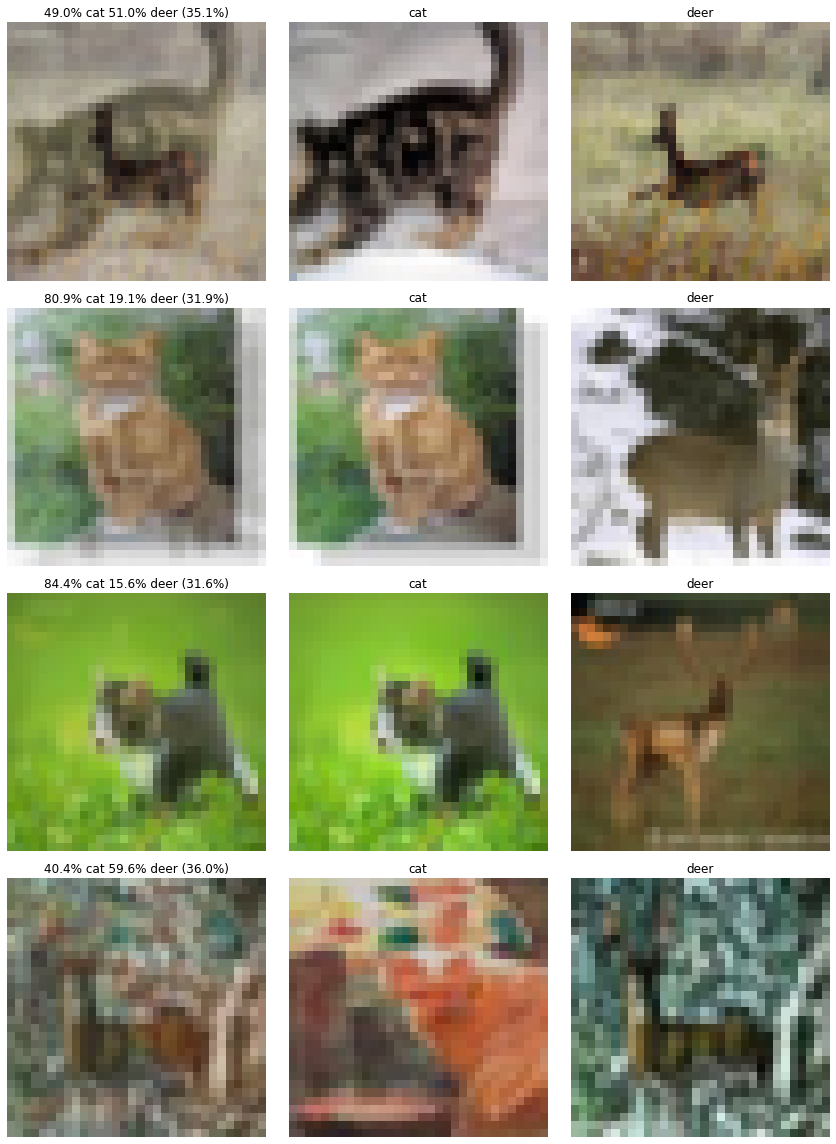

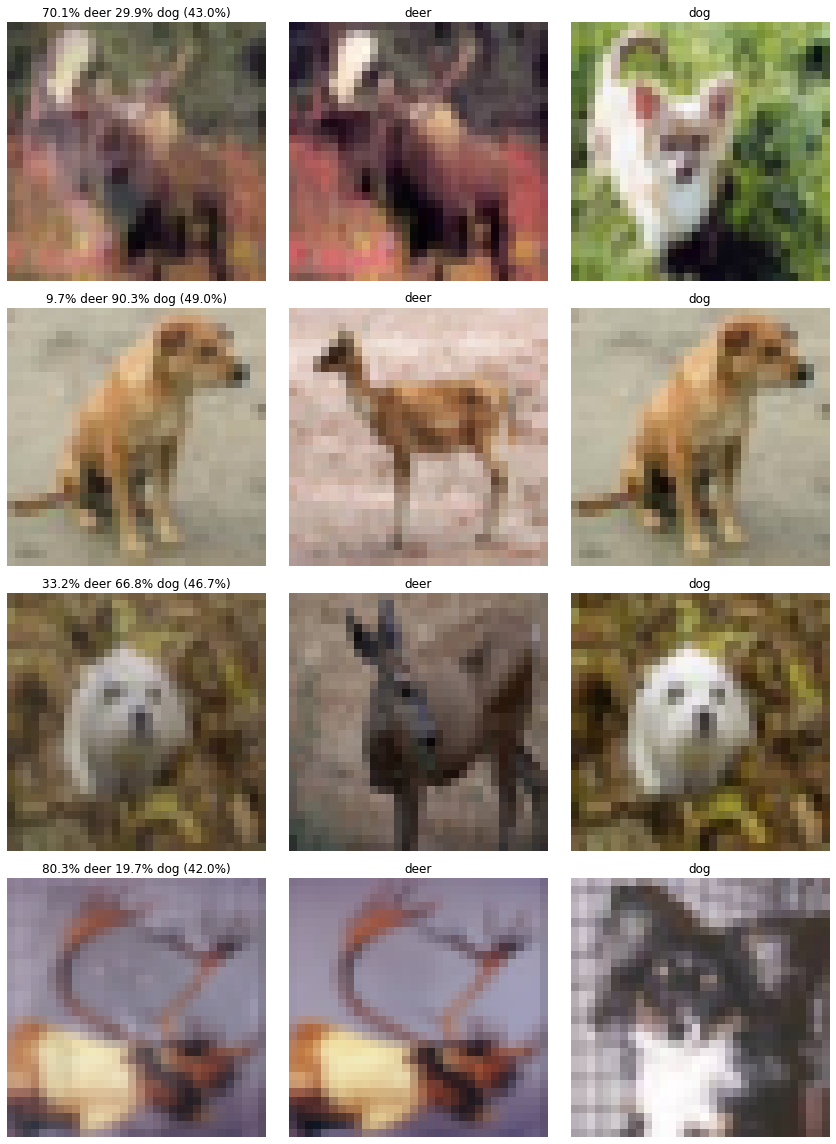

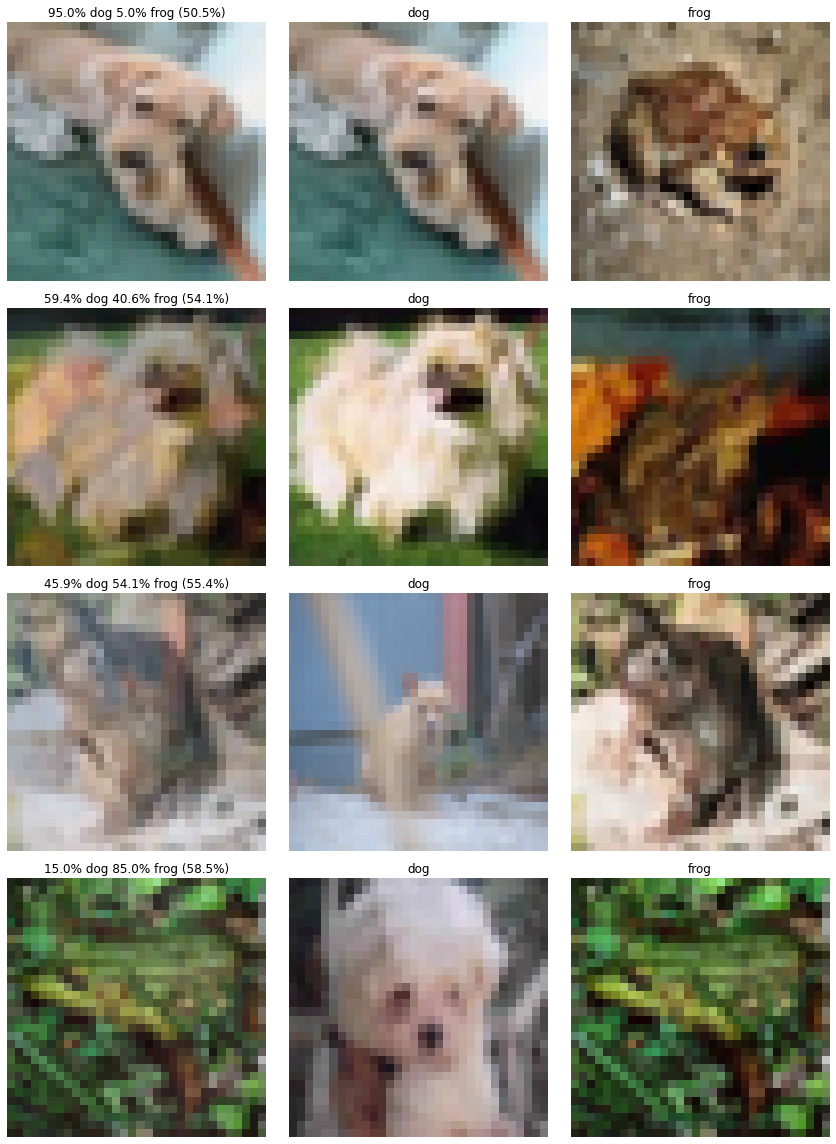

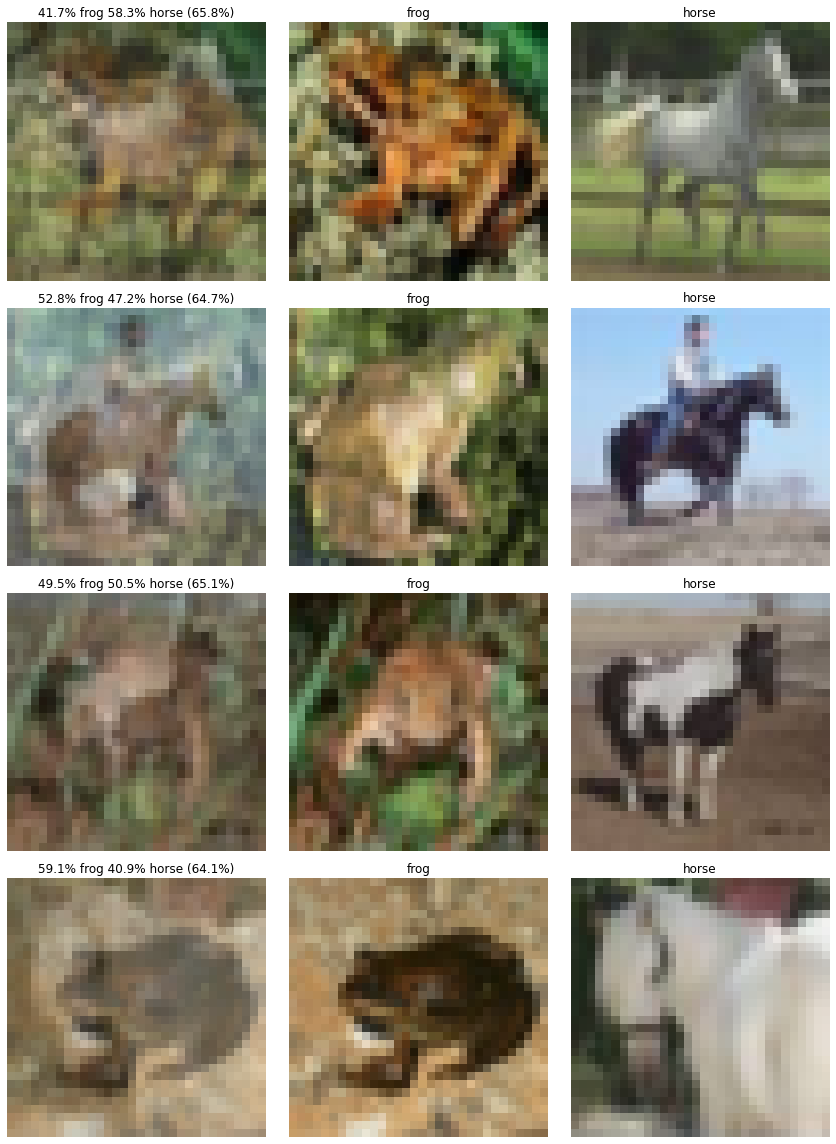

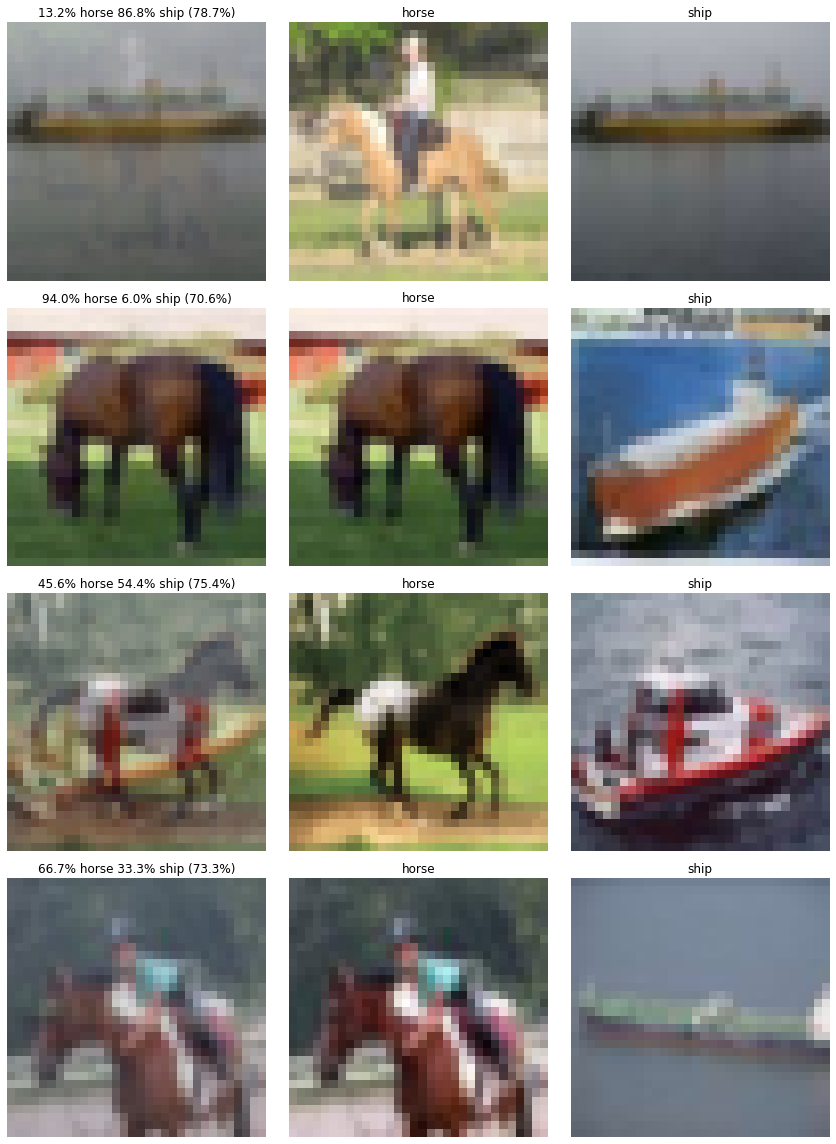

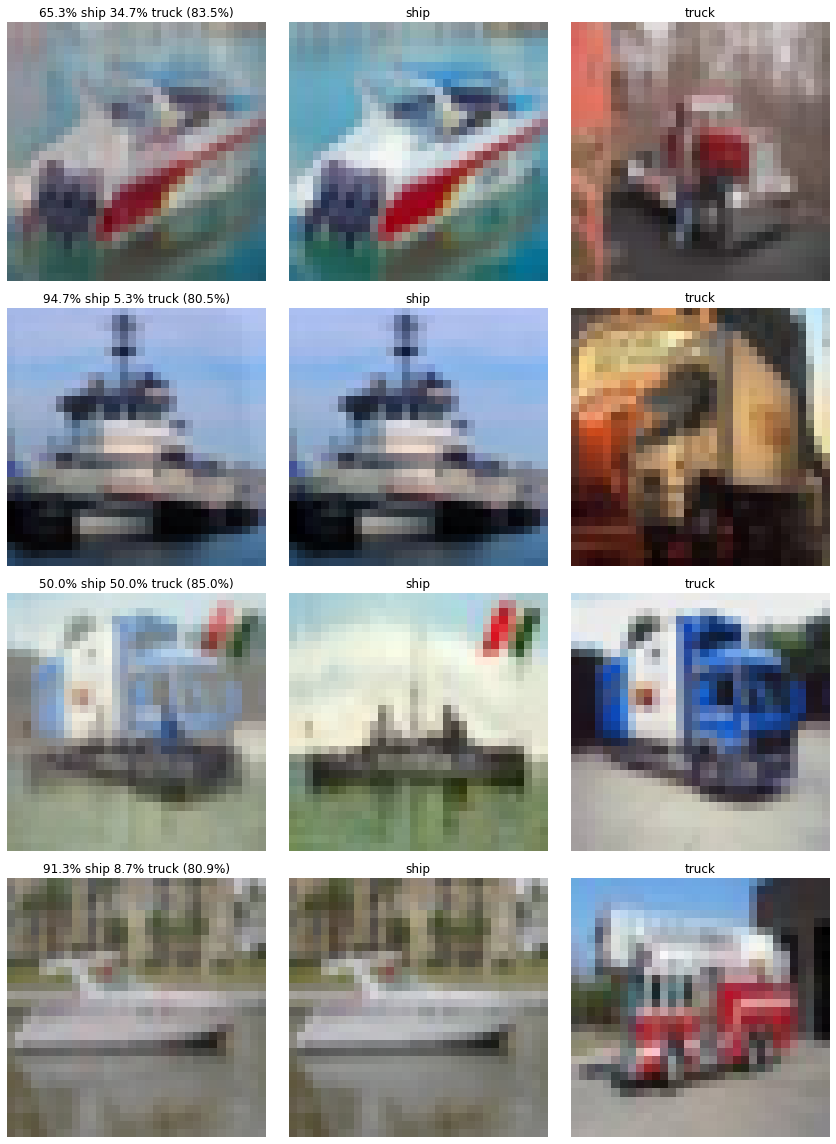

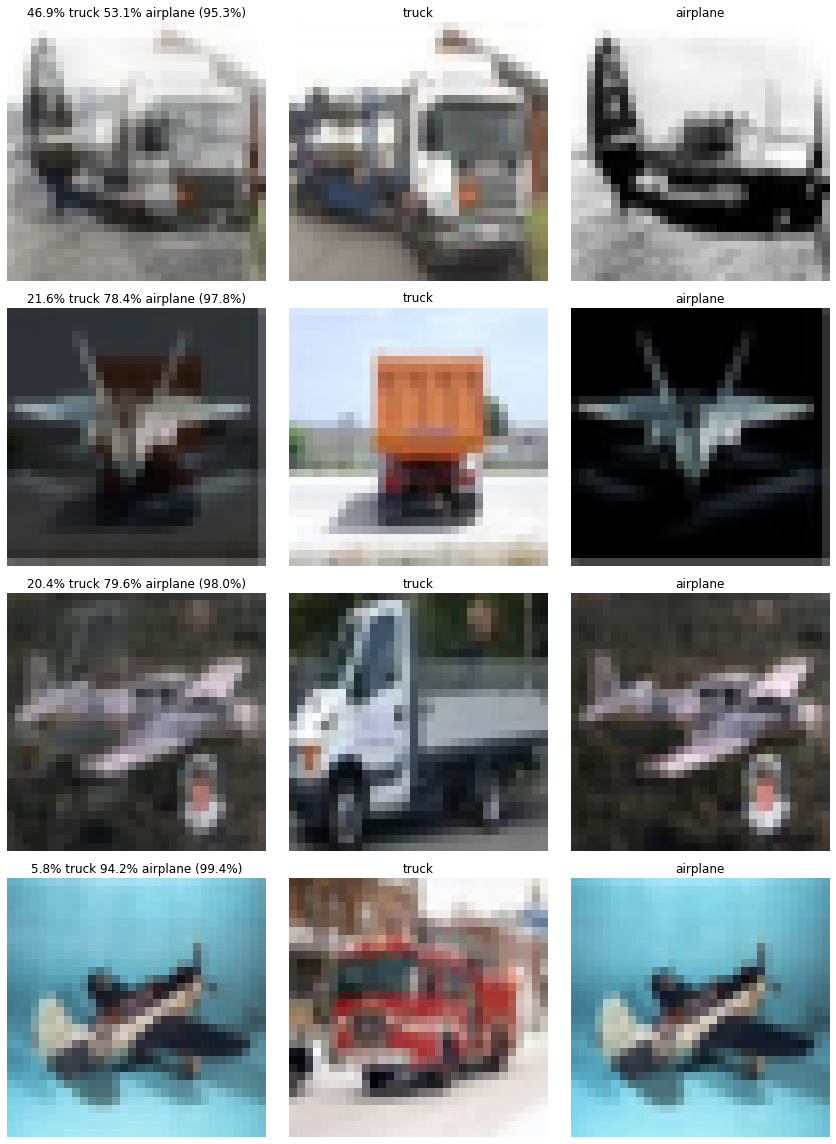

In [6]:
n = 500
images_arr = np.empty((n * 10, 32, 32, 3))
labels_arr = np.empty(n * 10)
images_arr_pure = np.empty((n * 10, 32, 32, 3))
labels_arr_pure = np.empty(n * 10)
original_labels = [None] * n * 10
original_labels_pure = [None] * n * 10
n_disp = 4

for i in range(10):
    indices_1 = test[test['y'] == i].index.to_numpy()
    indices_2 = test[test['y'] == (i + 1) % 10].index.to_numpy()
    
    # Get the pure ones
    images_arr_pure[i * n : (i + 1) * n] = x_test[indices_1[:n]]
    labels_arr_pure[i * n : (i + 1) * n] = np.ones(n) * i / 10.
    original_labels_pure[i * n : (i + 1) * n] = [str(i) + "_1"] * n

    # Remove the first n
    indices_1 = indices_1[n:]
    indices_2 = indices_2[n:]

    # Randomly sample n of the indices 
    indices_1 = np.random.choice(indices_1, size=n, replace=True)
    indices_2 = np.random.choice(indices_2, size=n, replace=True)

    # Generate n lambdas
    hybrids = np.random.uniform(size=n)
    lambdas = [[k] for k in hybrids]
    lambdas = np.tile(lambdas, (32 * 32 * 3)).reshape(n, 32, 32, 3)

    # Compute the probabilities 
    probs = (lambdas * i + (1 - lambdas) * (i + 1) % 10) / 10.

    # Create the hybrids 
    images = x_test[indices_1] * lambdas + x_test[indices_2] * (1 - lambdas)

    # Append images and labels to array
    images_arr[i * n : (i + 1) * n] = images
    labels_arr[i * n : (i + 1) * n] = [probs[k, 0, 0, 0] for k in range(len(probs))]
    for k in range(n):
        original_labels[i * n + k] = str(i) + "_" + str(hybrids[k])
        
    # Display the images
    fig, ax = plt.subplots(nrows=n_disp, ncols=3, figsize=(4*3, 4 * n_disp))
    for i_disp in range(n_disp): 
        ax[i_disp, 0].imshow(images[i_disp] / 255.)
        ax[i_disp, 0].set_title(str(round(round(lambdas[i_disp, 0, 0, 0], 3) * 100, 3)) + "% " + labels[i] + " " \
                        + str(round(100 - round(lambdas[i_disp, 0, 0, 0], 3) * 100, 3)) + "% " + labels[(i + 1) % 10] + " (" + \
                           str(round(100 * round(probs[i_disp, 0, 0, 0], 3), 3)) + "%)")
        ax[i_disp, 1].imshow(x_test[indices_1[i_disp]])
        ax[i_disp, 1].set_title(labels[i])
        ax[i_disp, 2].imshow(x_test[indices_2[i_disp]])
        ax[i_disp, 2].set_title(labels[(i + 1) % 10])
        for j in range(3):
            ax[i_disp, j].axis('off')
        assert(probs[i_disp, 0, 0, 0] == labels_arr[i * n + i_disp])
    plt.tight_layout()
    plt.show()

    
# Do sampling and converting to one-hot
samples_arr = np.random.binomial(1, labels_arr)
samples_arr = tf.keras.utils.to_categorical(samples_arr, num_classes=2)
categorical_labels_arr = np.empty((len(labels_arr), 2))
categorical_labels_arr[:, 1] = labels_arr
categorical_labels_arr[:, 0] = 1 - labels_arr

samples_arr_pure = np.random.binomial(1, labels_arr_pure)
samples_arr_pure = tf.keras.utils.to_categorical(samples_arr_pure, num_classes=2)
categorical_labels_arr_pure = np.empty((len(labels_arr_pure), 2))
categorical_labels_arr_pure[:, 1] = labels_arr_pure
categorical_labels_arr_pure[:, 0] = 1 - labels_arr_pure

# Concatenate
images_arr = np.concatenate((images_arr, images_arr_pure))
categorical_labels_arr = np.concatenate((categorical_labels_arr, categorical_labels_arr_pure))
samples_arr = np.concatenate((samples_arr, samples_arr_pure))
original_labels = np.concatenate((original_labels, original_labels_pure))

# Save
np.save("data_hybrids_uniform/test_images.npy", images_arr)
np.save("data_hybrids_uniform/test_probs.npy", categorical_labels_arr)
np.save("data_hybrids_uniform/test_labels.npy", samples_arr)
np.save("data_hybrids_uniform/test_original_labels.npy", original_labels)

# Load the Data

In [7]:
train_images = np.load("data_hybrids_uniform/train_images.npy")
train_probs = np.load("data_hybrids_uniform/train_probs.npy")
train_labels = np.load("data_hybrids_uniform/train_labels.npy")
train_original_labels = np.load("data_hybrids_uniform/train_original_labels.npy")
test_images = np.load("data_hybrids_uniform/test_images.npy")
test_probs = np.load("data_hybrids_uniform/test_probs.npy")
test_labels = np.load("data_hybrids_uniform/test_labels.npy")
test_original_labels = np.load("data_hybrids_uniform/test_original_labels.npy")

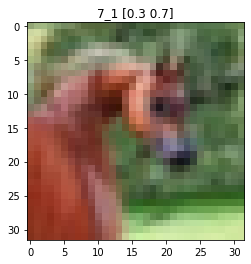

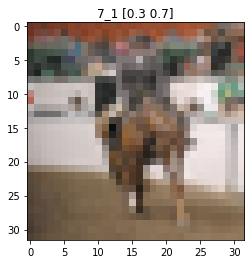

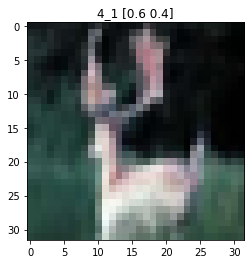

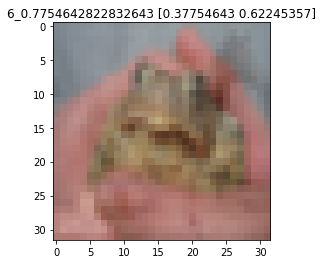

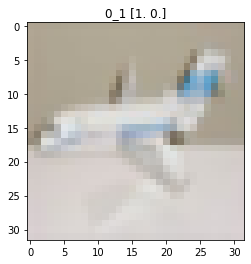

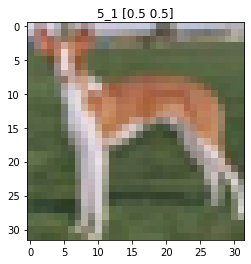

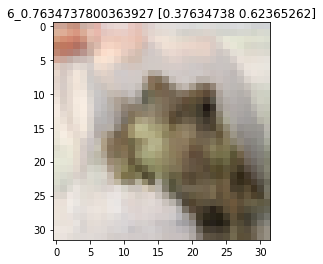

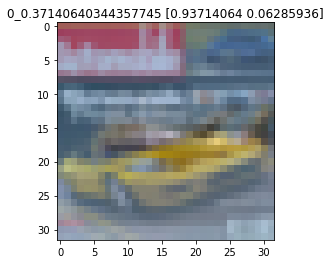

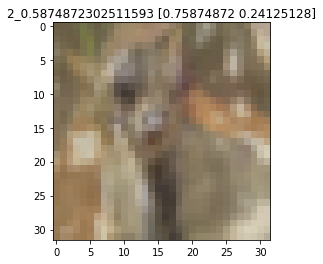

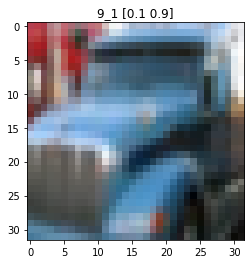

In [8]:
n_disp = 10
for i_disp in np.random.randint(0, len(train_images), size=n_disp):
    plt.imshow(train_images[i_disp] / 255.)
    plt.title((train_original_labels[i_disp] + " " + str(train_probs[i_disp])))
    plt.show()

# Redo Except with Fixed Lambdas

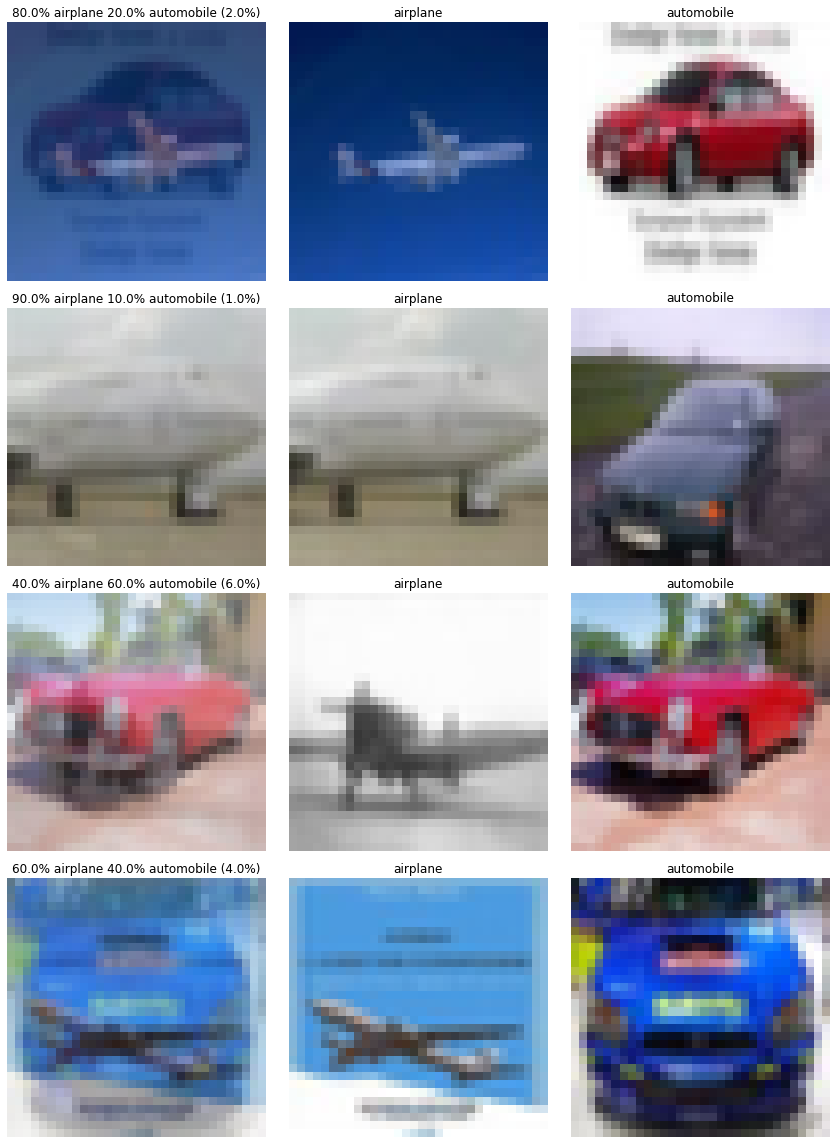

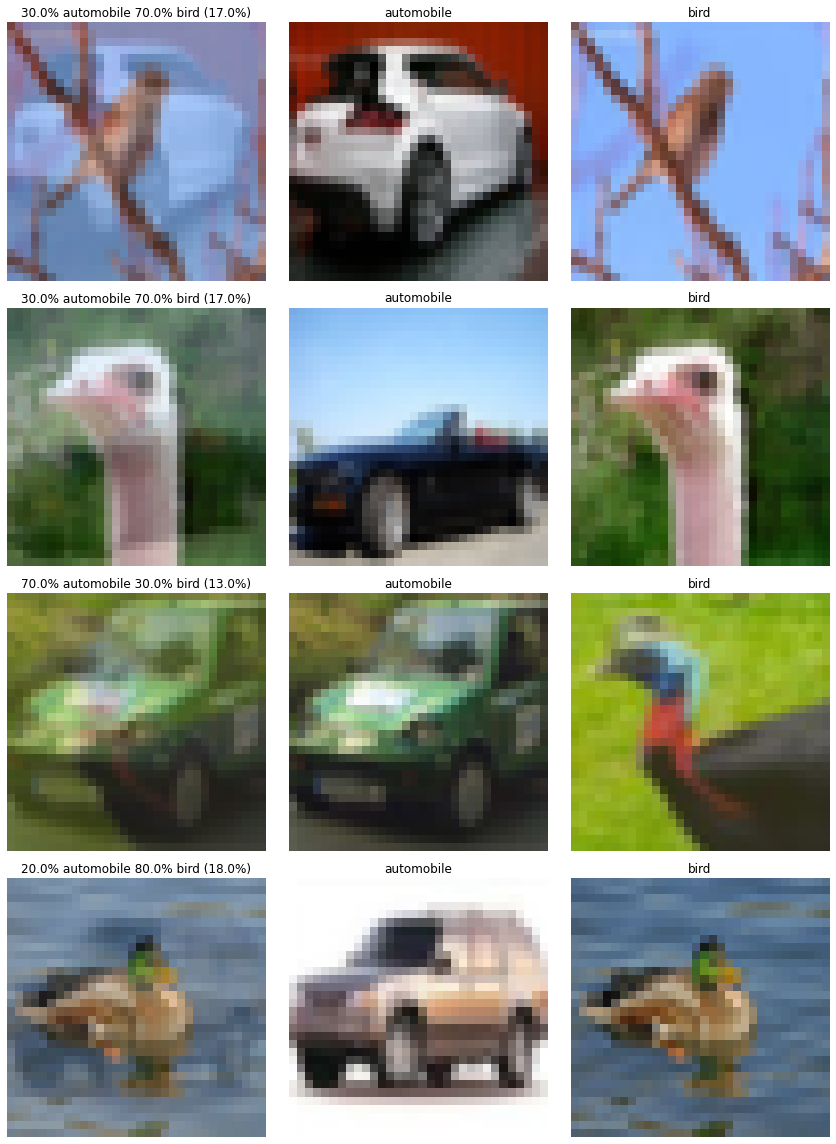

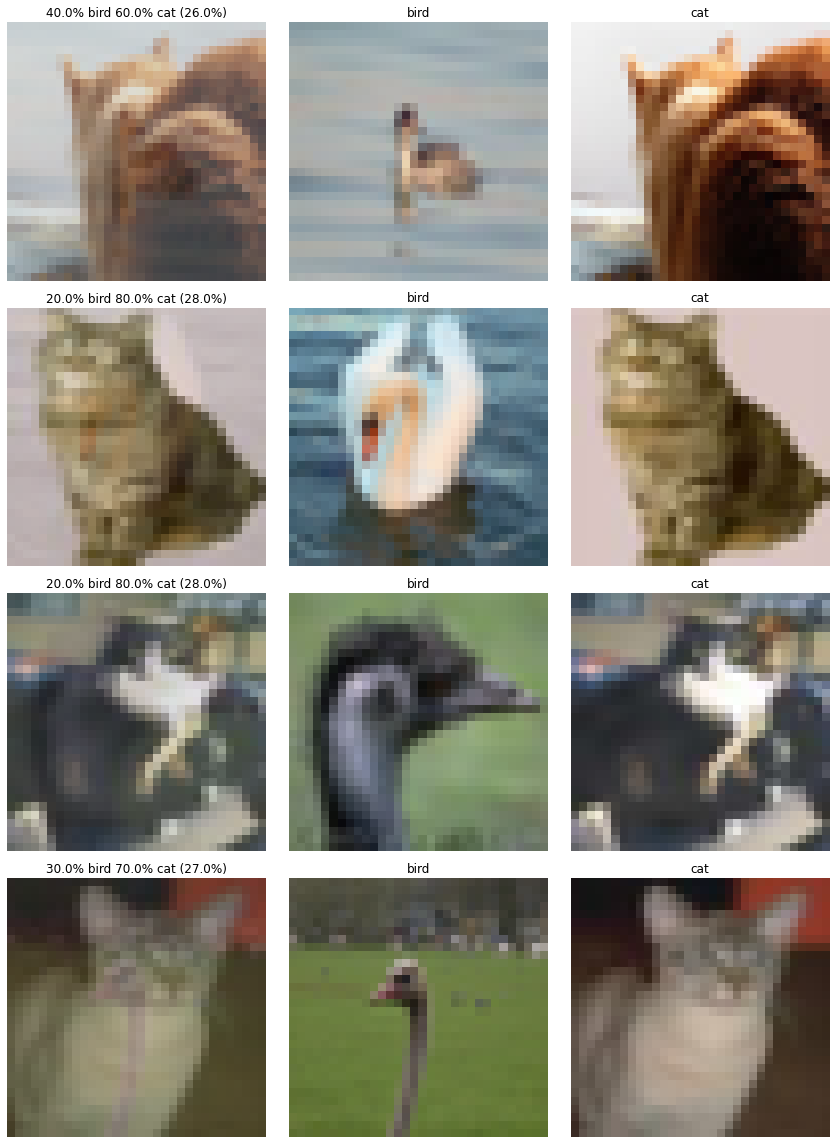

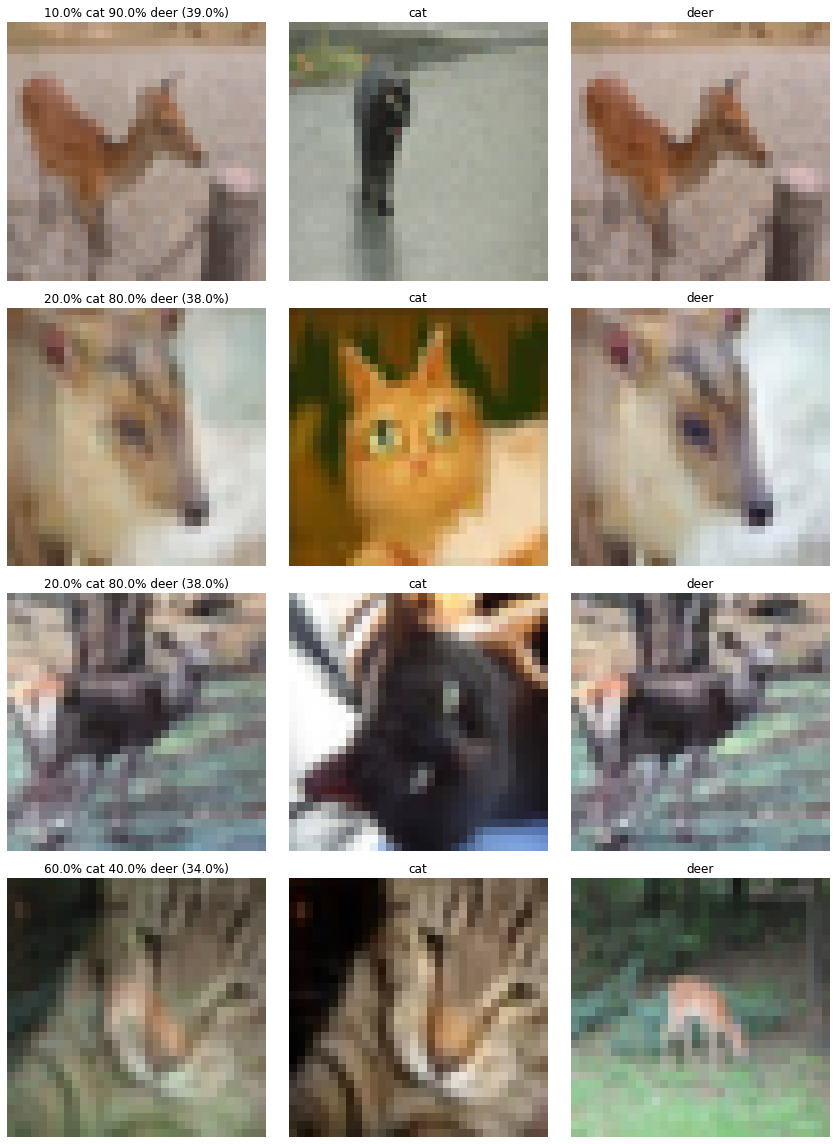

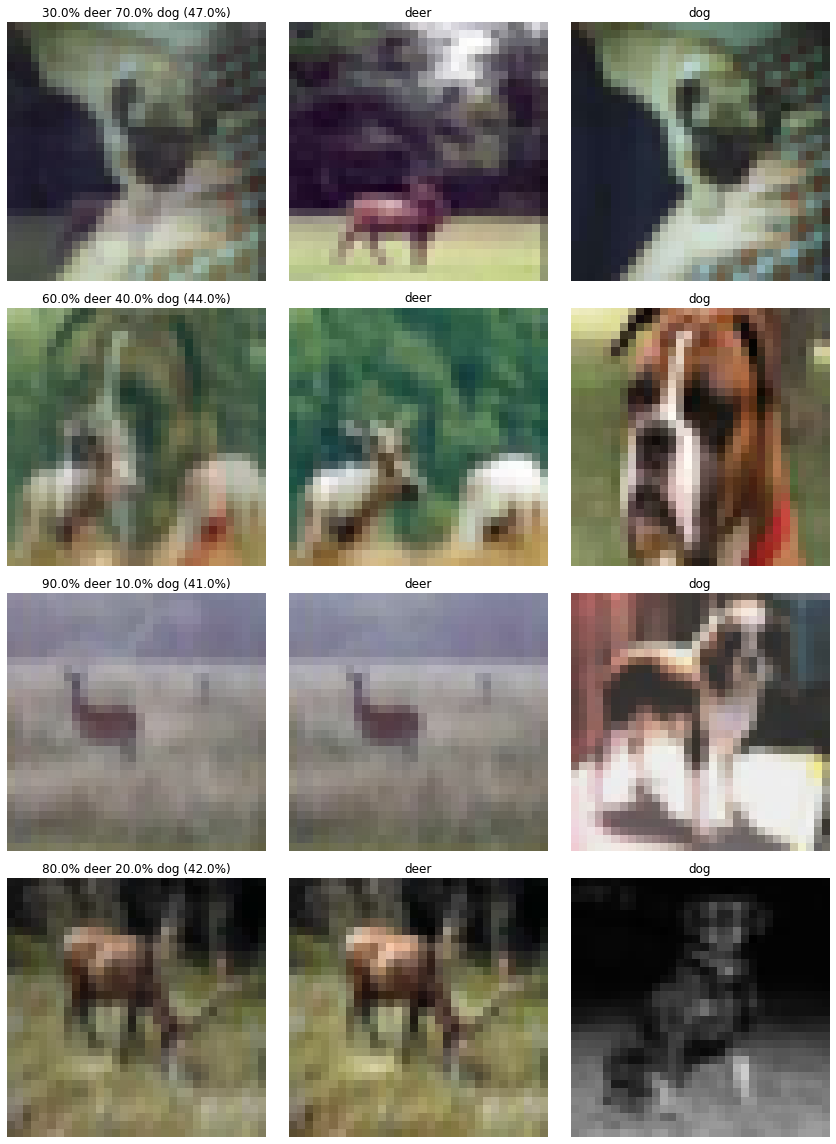

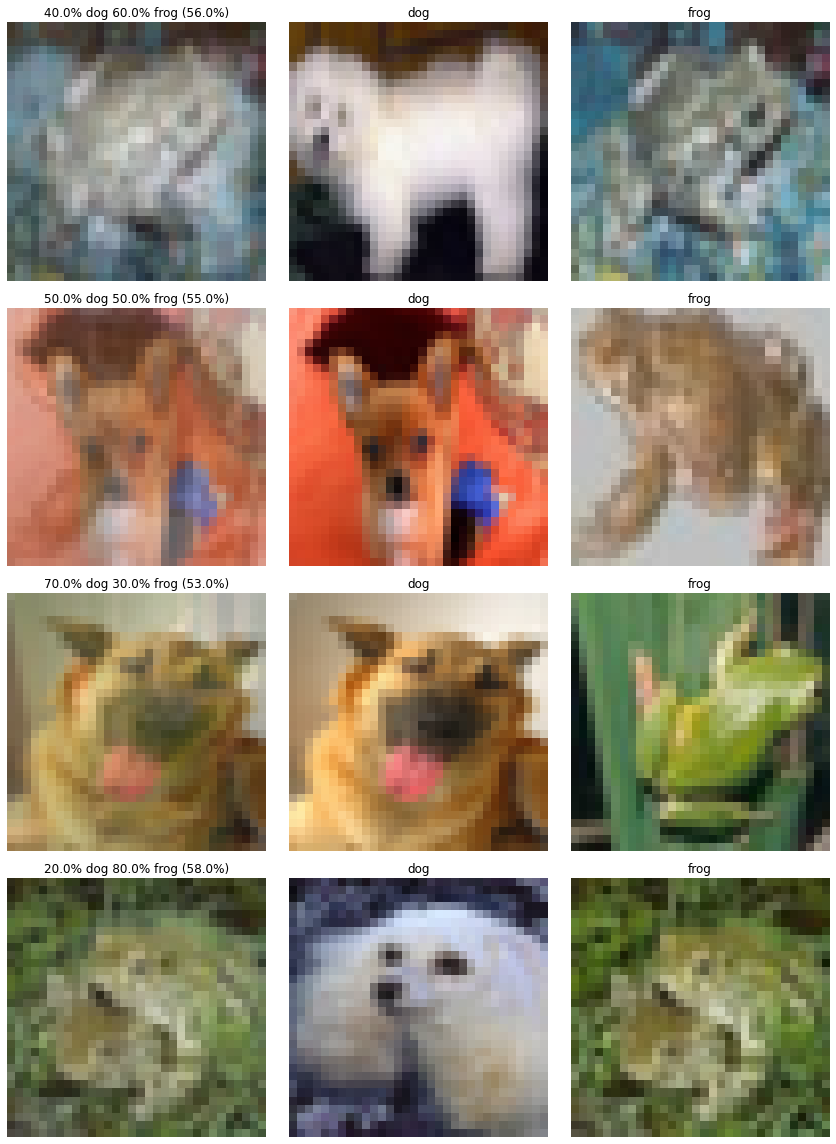

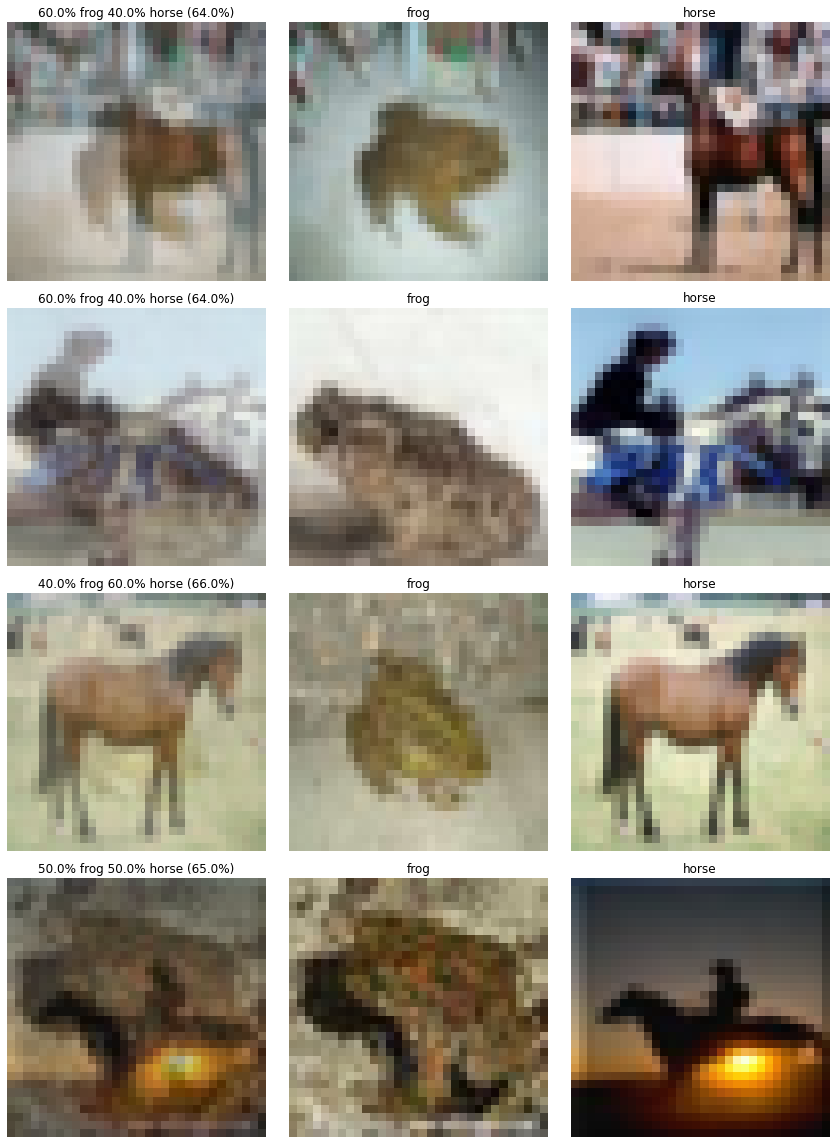

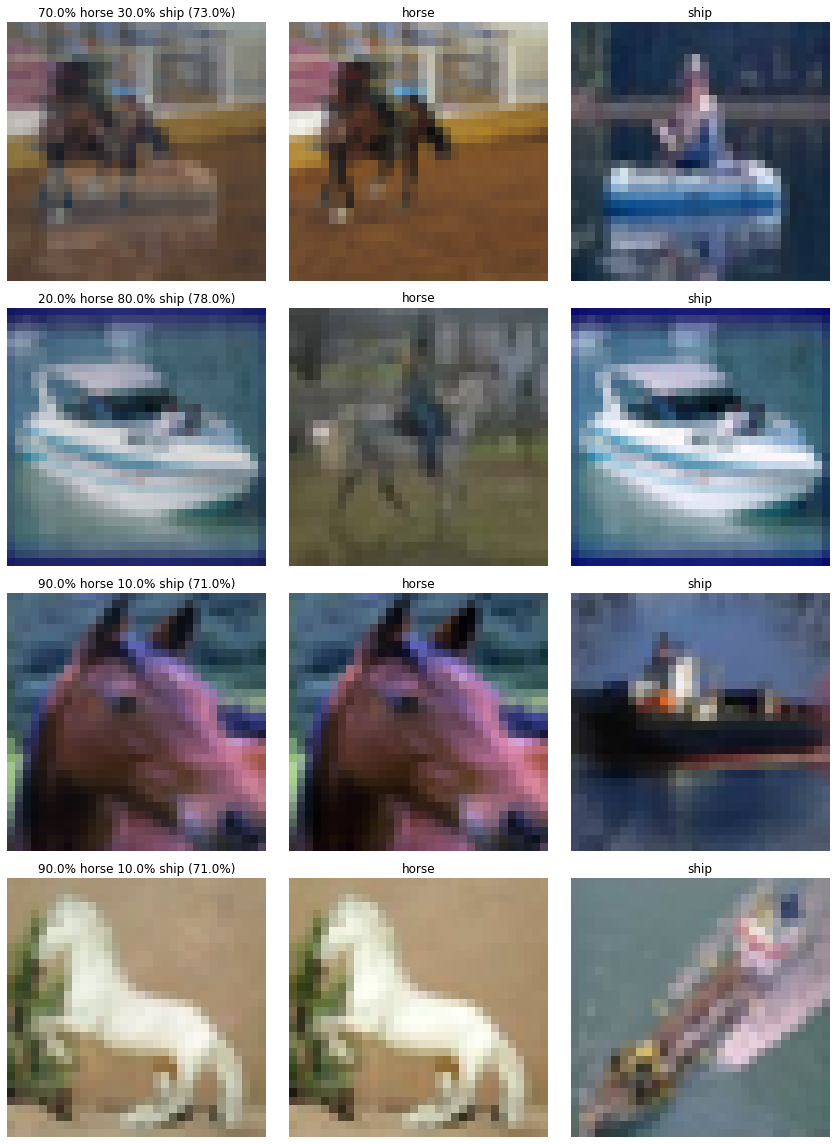

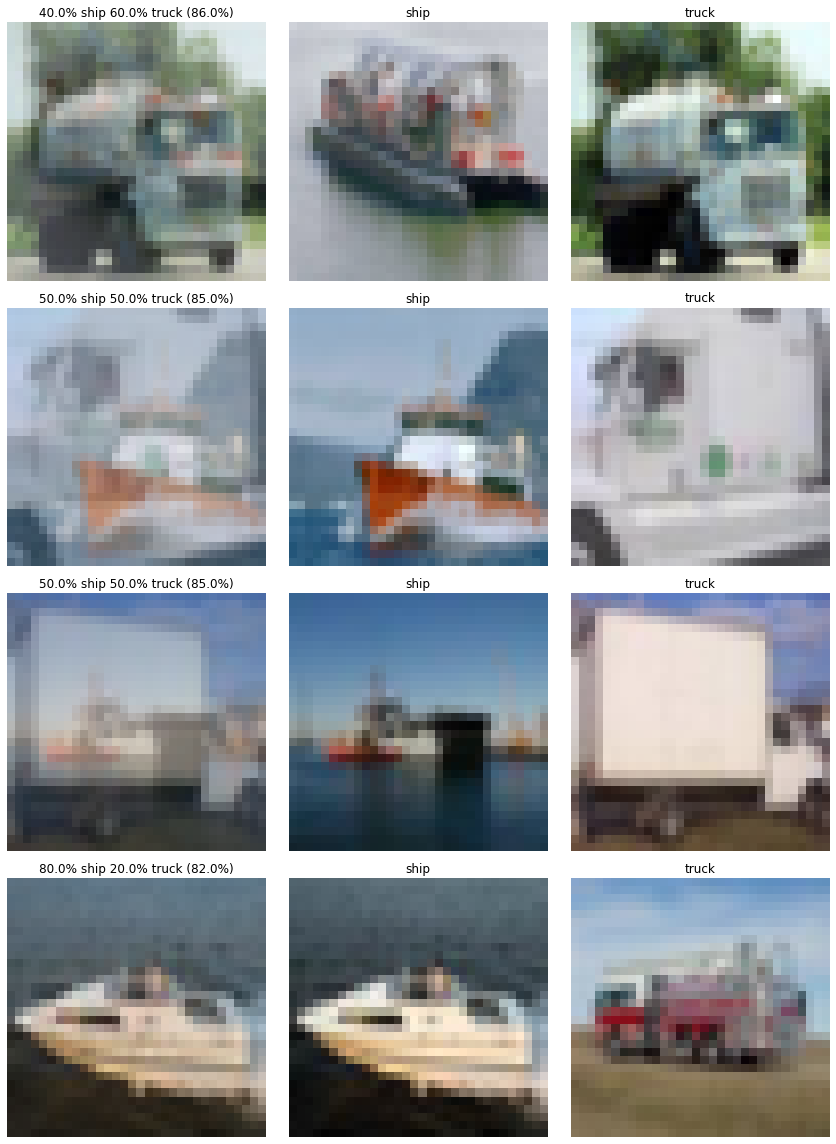

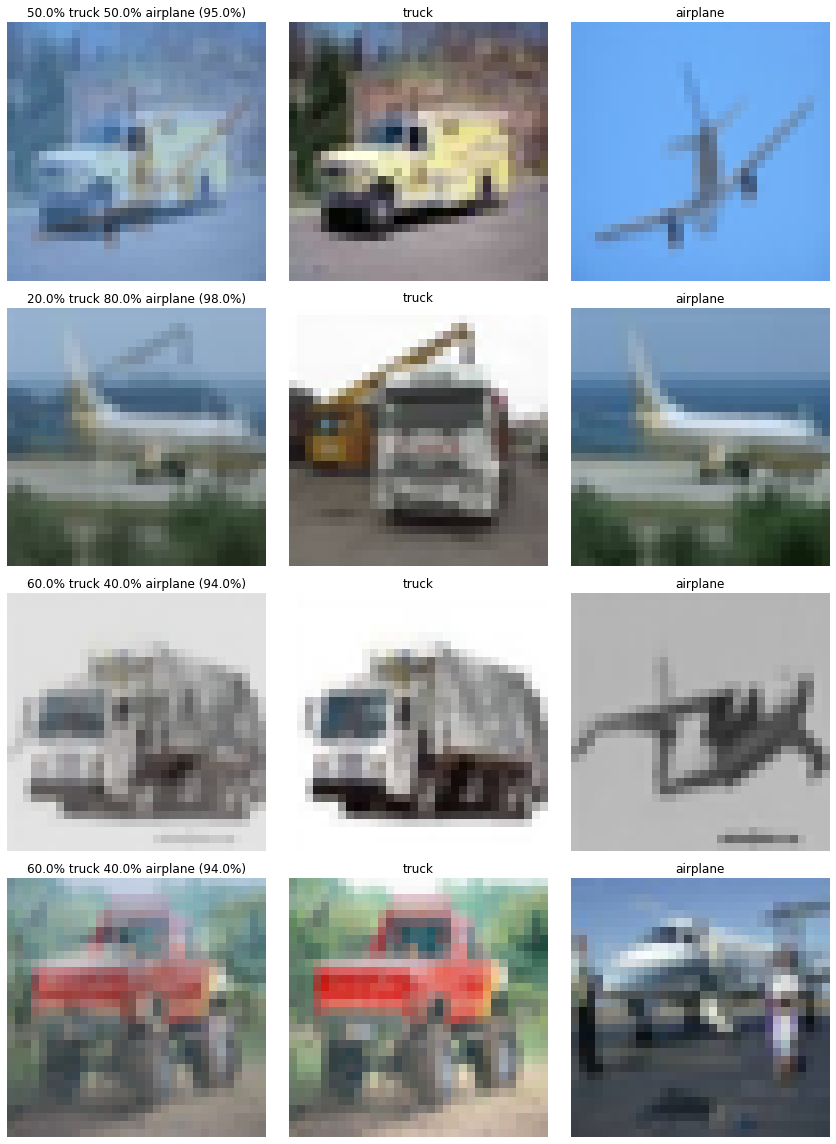

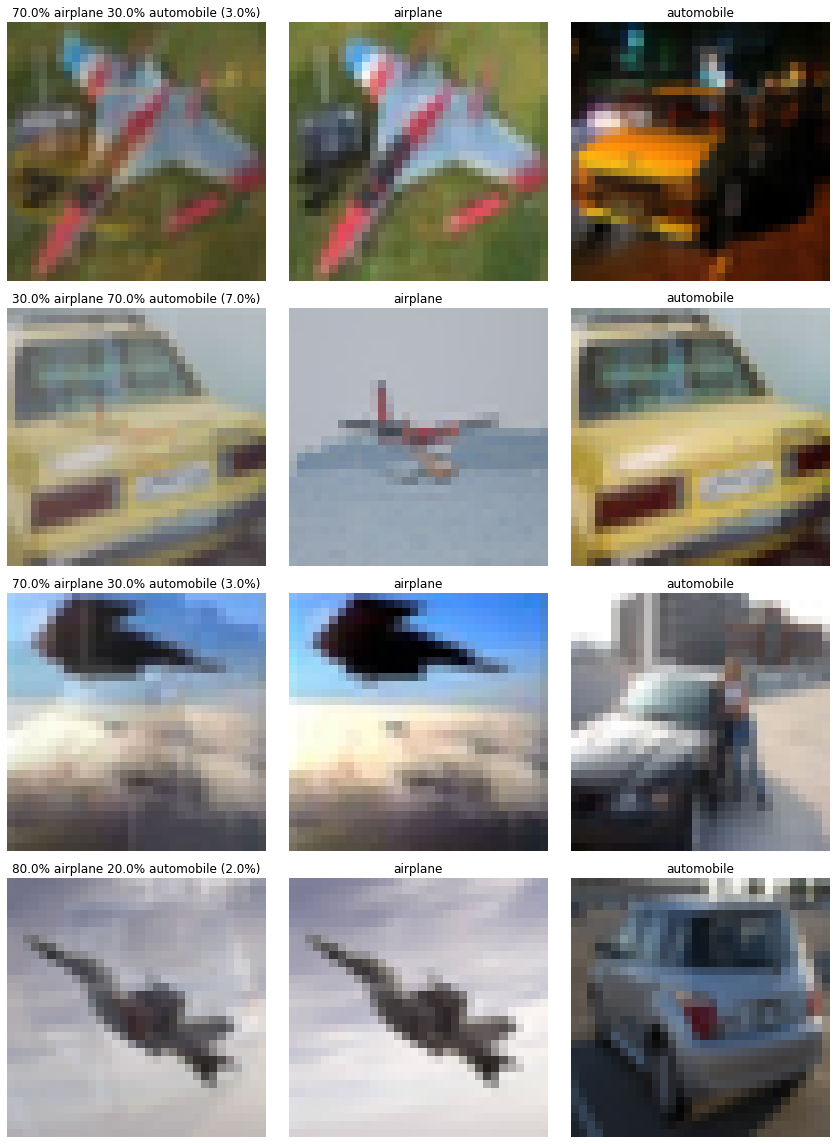

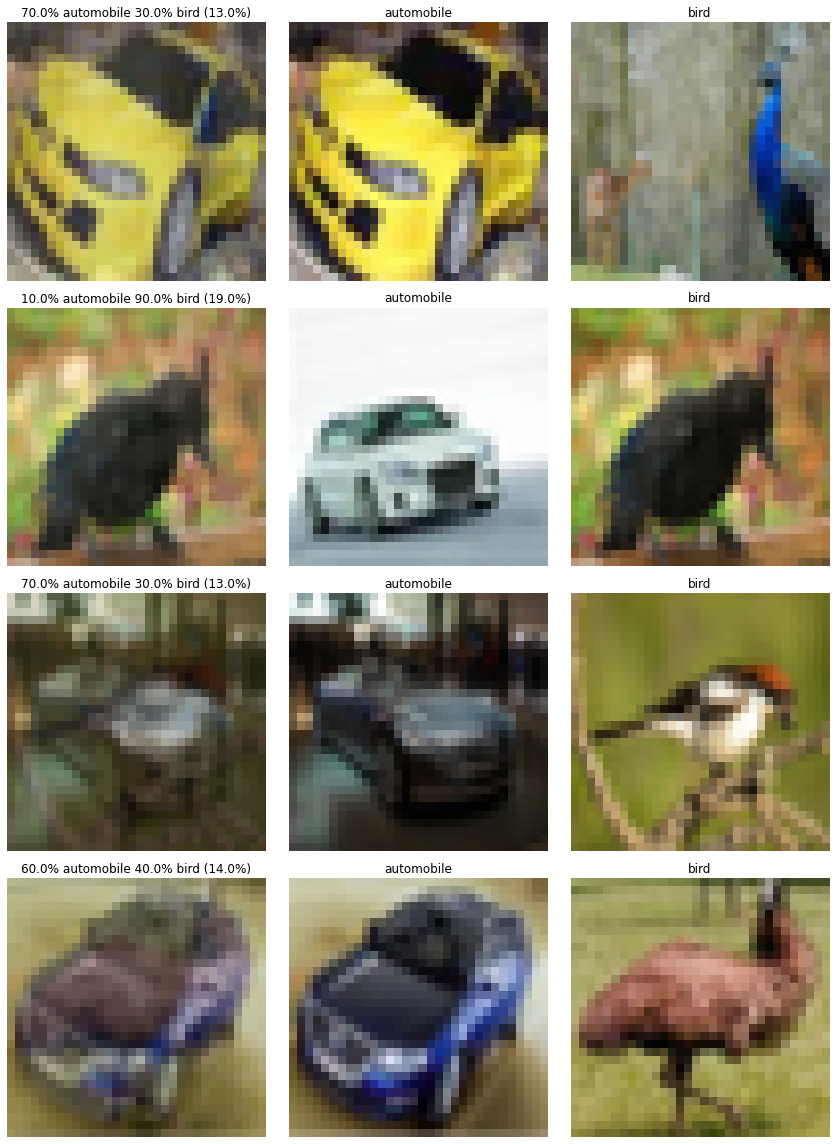

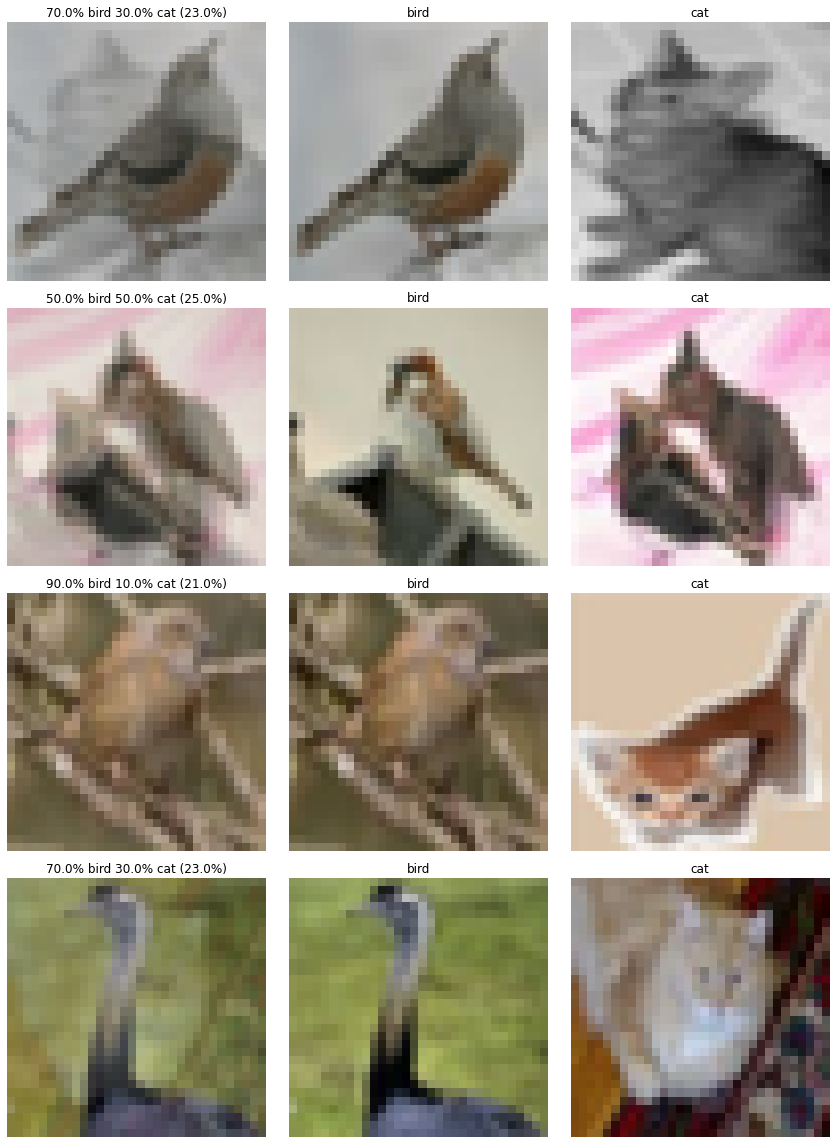

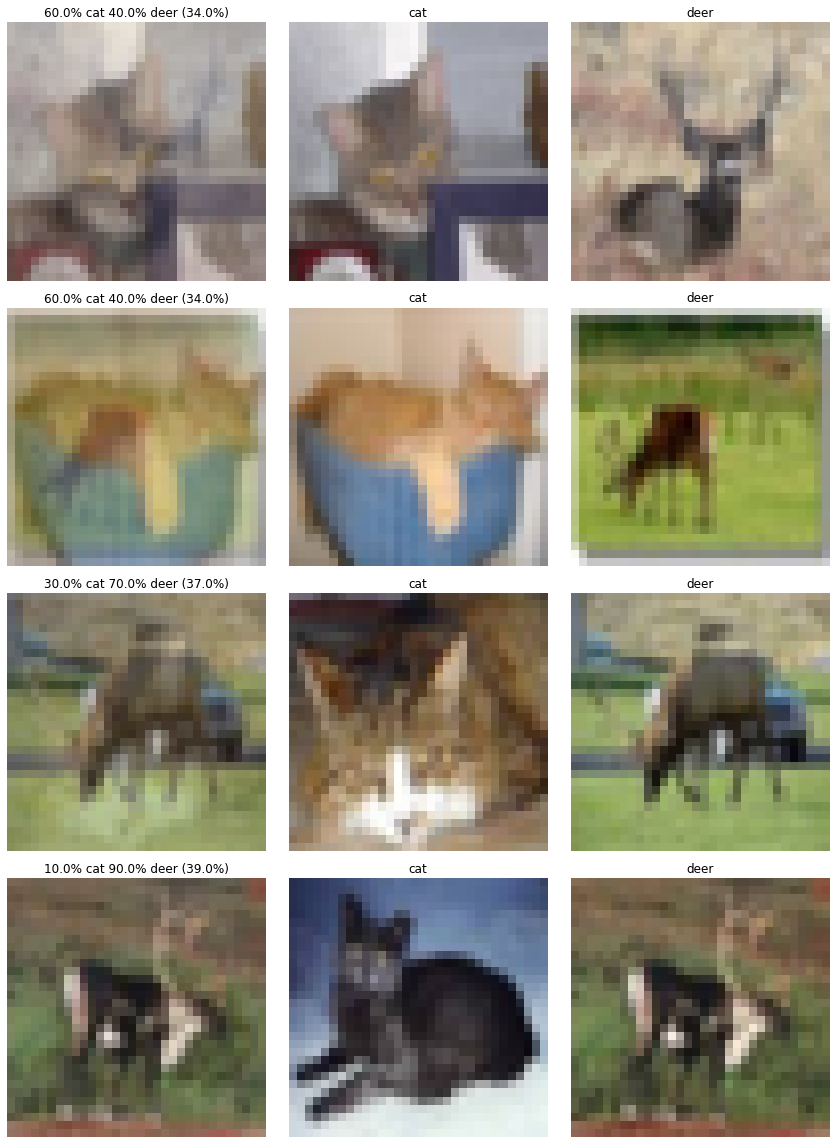

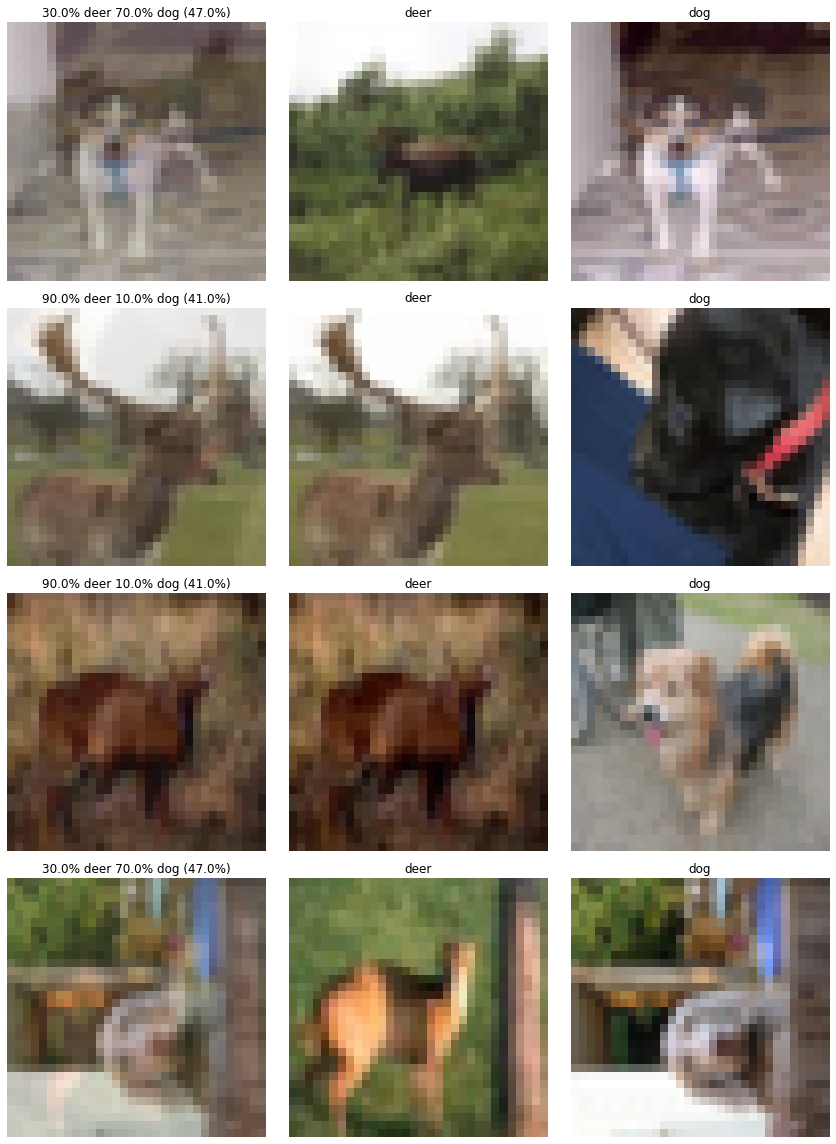

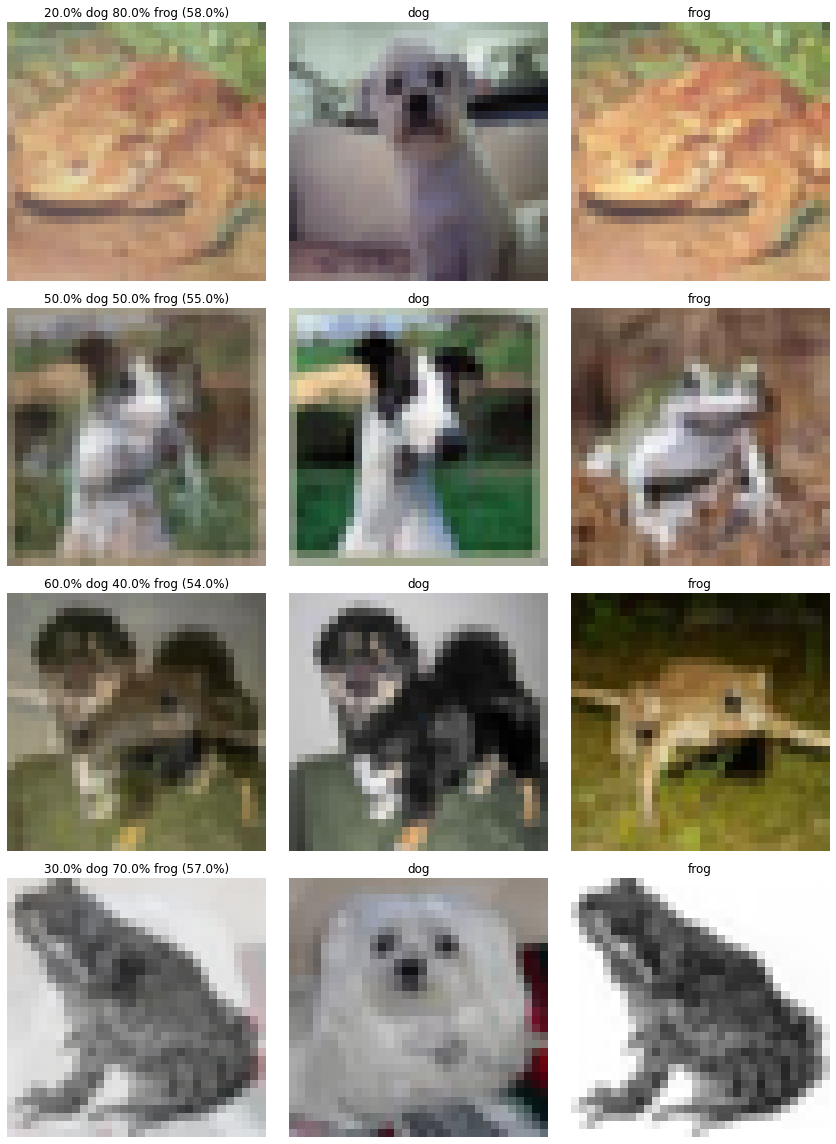

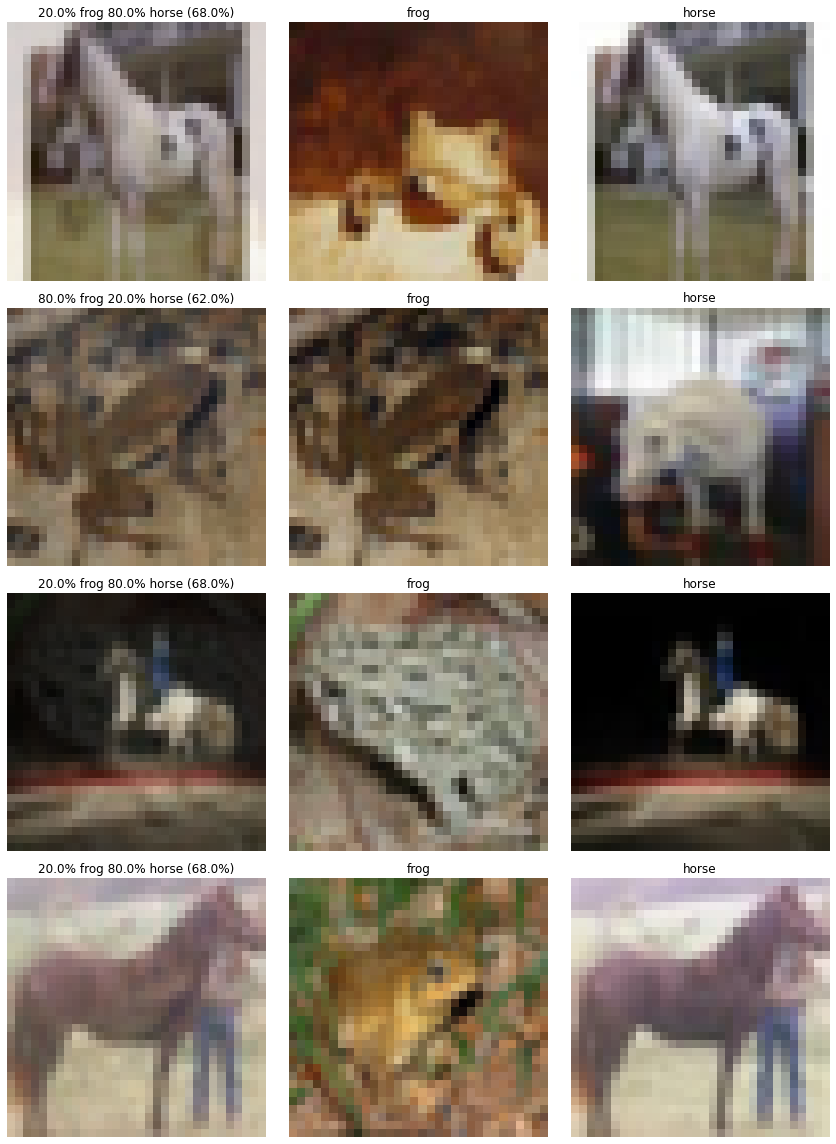

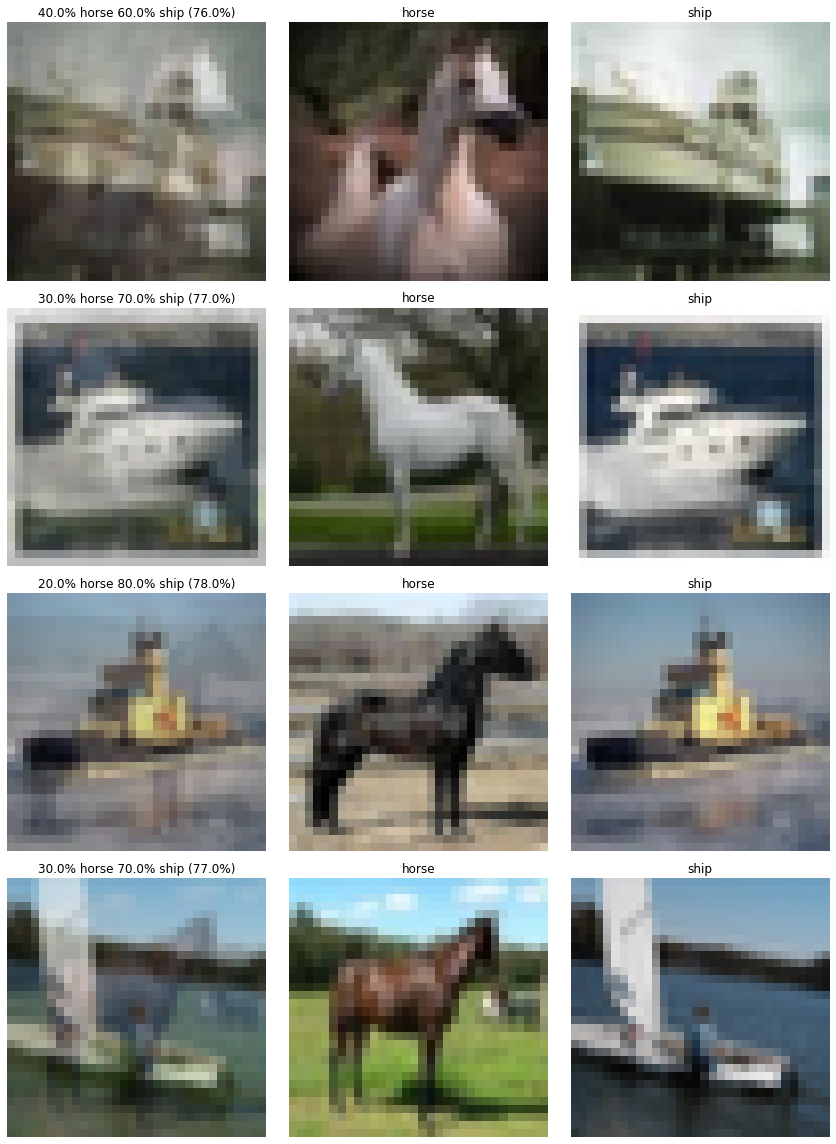

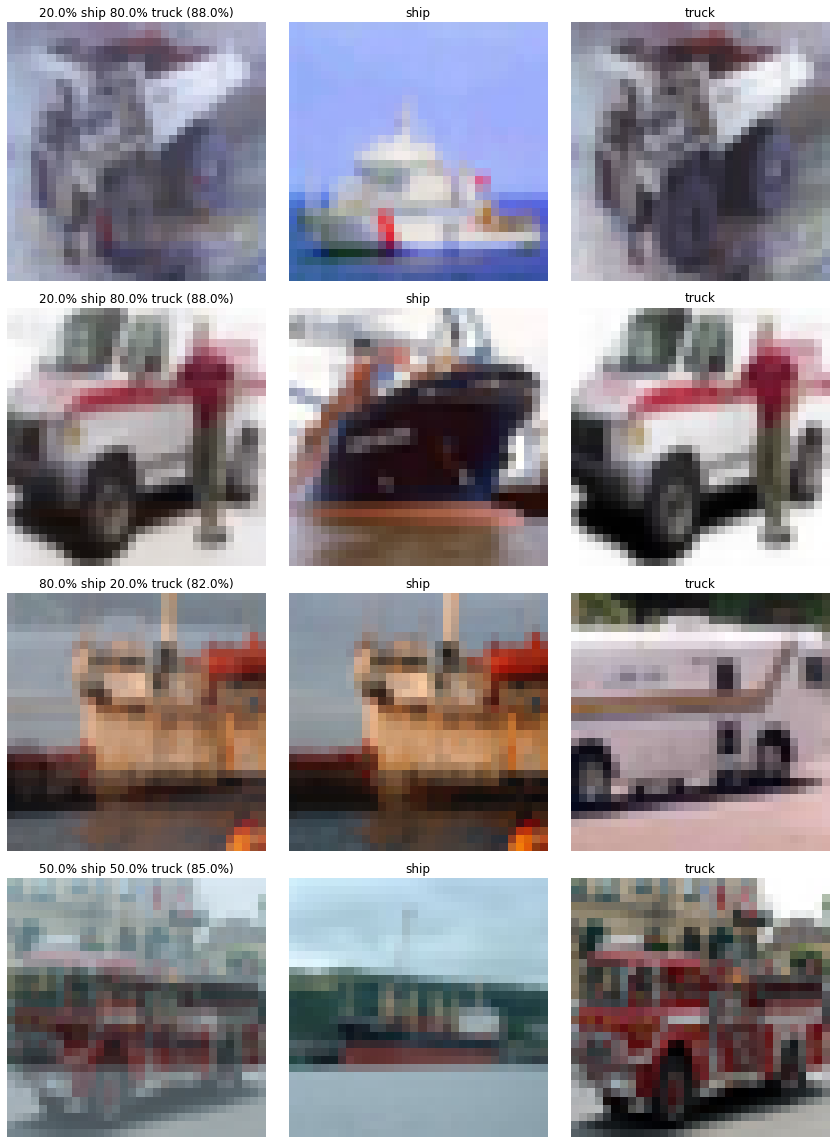

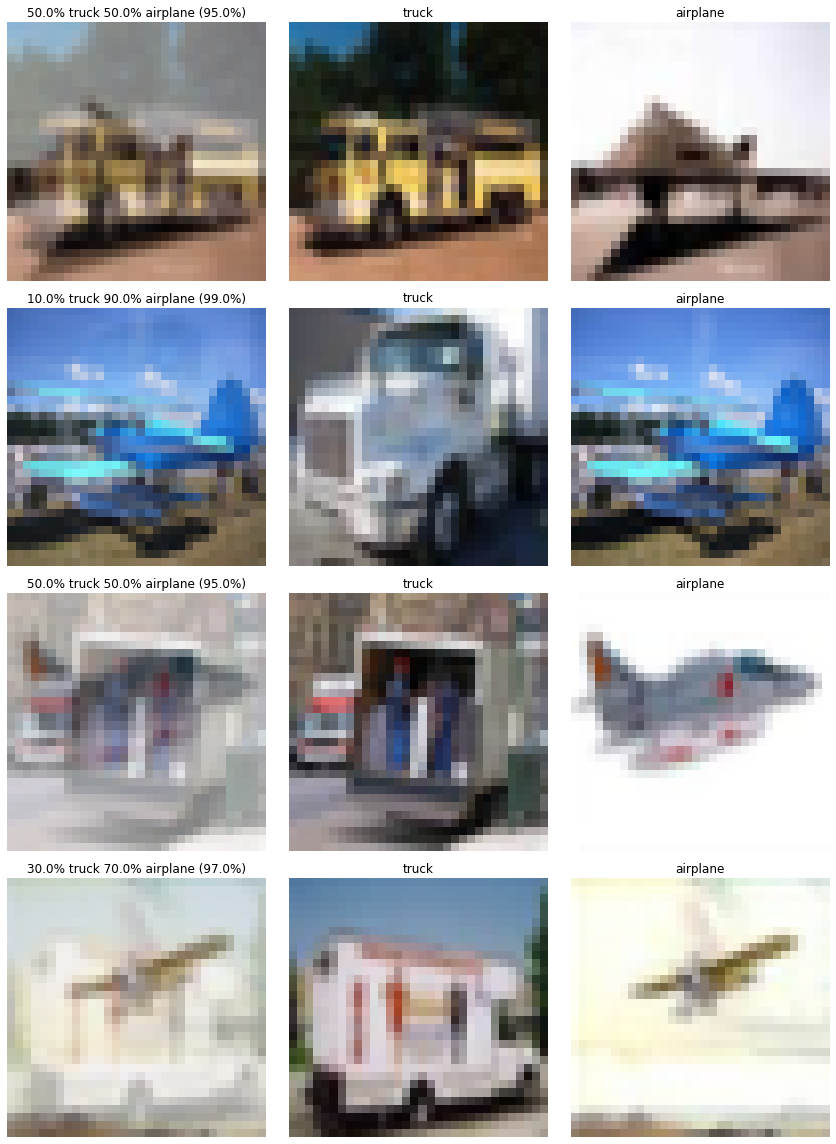

In [10]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
test = pd.DataFrame(data=np.ravel(y_test), columns=['y'])
train = pd.DataFrame(data=np.ravel(y_train), columns=['y'])

n = 500
images_arr = np.empty((n * 10, 32, 32, 3))
labels_arr = np.empty(n * 10)
images_arr_pure = np.empty((n * 10, 32, 32, 3))
labels_arr_pure = np.empty(n * 10)
original_labels = [None] * n * 10
original_labels_pure = [None] * n * 10
n_disp = 4

for i in range(10):
    indices_1 = train[train['y'] == i].index.to_numpy()
    indices_2 = train[train['y'] == (i + 1) % 10].index.to_numpy()
    
    # Get the pure ones
    images_arr_pure[i * n : (i + 1) * n] = x_train[indices_1[:n]]
    labels_arr_pure[i * n : (i + 1) * n] = np.ones(n) * i / 10.
    original_labels_pure[i * n : (i + 1) * n] = [str(i) + "_1"] * n

    # Remove the first n
    indices_1 = indices_1[n:]
    indices_2 = indices_2[n:]

    # Randomly sample n of the indices 
    indices_1 = np.random.choice(indices_1, size=n, replace=True)
    indices_2 = np.random.choice(indices_2, size=n, replace=True)

    # Generate n lambdas
    hybrids = np.random.choice(np.linspace(0, 1, 11)[1:-1], size=n, replace=True)
    lambdas = [[k] for k in hybrids]
    lambdas = np.tile(lambdas, (32 * 32 * 3)).reshape(n, 32, 32, 3)

    # Compute the probabilities 
    probs = (lambdas * i + (1 - lambdas) * (i + 1) % 10) / 10.

    # Create the hybrids 
    images = x_train[indices_1] * lambdas + x_train[indices_2] * (1 - lambdas)

    # Append images and labels to array
    images_arr[i * n : (i + 1) * n] = images
    labels_arr[i * n : (i + 1) * n] = [probs[k, 0, 0, 0] for k in range(len(probs))]
    for k in range(n):
        original_labels[i * n + k] = str(i) + "_" + str(hybrids[k])
        
    # Display the images
    fig, ax = plt.subplots(nrows=n_disp, ncols=3, figsize=(4*3, 4 * n_disp))
    for i_disp in range(n_disp):
        ax[i_disp, 0].imshow(images[i_disp] /255.)
        ax[i_disp, 0].set_title(str(round(round(lambdas[i_disp, 0, 0, 0], 3) * 100, 3)) + "% " + labels[i] + " " \
                        + str(round(100 - round(lambdas[i_disp, 0, 0, 0], 3) * 100, 3)) + "% " + labels[(i + 1) % 10] + " (" + \
                           str(round(100 * round(probs[i_disp, 0, 0, 0], 3), 3)) + "%)")
        ax[i_disp, 1].imshow(x_train[indices_1[i_disp]])
        ax[i_disp, 1].set_title(labels[i])
        ax[i_disp, 2].imshow(x_train[indices_2[i_disp]])
        ax[i_disp, 2].set_title(labels[(i + 1) % 10])
        for j in range(3):
            ax[i_disp, j].axis('off')
        assert(probs[i_disp, 0, 0, 0] == labels_arr[i * n + i_disp])
    plt.tight_layout()
    plt.show()

    
# Do sampling and converting to one-hot
samples_arr = np.random.binomial(1, labels_arr)
samples_arr = tf.keras.utils.to_categorical(samples_arr, num_classes=2)
categorical_labels_arr = np.empty((len(labels_arr), 2))
categorical_labels_arr[:, 1] = labels_arr
categorical_labels_arr[:, 0] = 1 - labels_arr

samples_arr_pure = np.random.binomial(1, labels_arr_pure)
samples_arr_pure = tf.keras.utils.to_categorical(samples_arr_pure, num_classes=2)
categorical_labels_arr_pure = np.empty((len(labels_arr_pure), 2))
categorical_labels_arr_pure[:, 1] = labels_arr_pure
categorical_labels_arr_pure[:, 0] = 1 - labels_arr_pure

# Concatenate
images_arr = np.concatenate((images_arr, images_arr_pure))
categorical_labels_arr = np.concatenate((categorical_labels_arr, categorical_labels_arr_pure))
samples_arr = np.concatenate((samples_arr, samples_arr_pure))
original_labels = np.concatenate((original_labels, original_labels_pure))

# Save
np.save("data_hybrids_fixed/train_images.npy", images_arr)
np.save("data_hybrids_fixed/train_probs.npy", categorical_labels_arr)
np.save("data_hybrids_fixed/train_labels.npy", samples_arr)
np.save("data_hybrids_fixed/train_original_labels.npy", original_labels)

n = 500
images_arr = np.empty((n * 10, 32, 32, 3))
labels_arr = np.empty(n * 10)
images_arr_pure = np.empty((n * 10, 32, 32, 3))
labels_arr_pure = np.empty(n * 10)
original_labels = [None] * n * 10
original_labels_pure = [None] * n * 10
n_disp = 4

for i in range(10):
    indices_1 = test[test['y'] == i].index.to_numpy()
    indices_2 = test[test['y'] == (i + 1) % 10].index.to_numpy()
    
    # Get the pure ones
    images_arr_pure[i * n : (i + 1) * n] = x_test[indices_1[:n]]
    labels_arr_pure[i * n : (i + 1) * n] = np.ones(n) * i / 10.
    original_labels_pure[i * n : (i + 1) * n] = [str(i) + "_1"] * n

    # Remove the first n
    indices_1 = indices_1[n:]
    indices_2 = indices_2[n:]

    # Randomly sample n of the indices 
    indices_1 = np.random.choice(indices_1, size=n, replace=True)
    indices_2 = np.random.choice(indices_2, size=n, replace=True)

    # Generate n lambdas
    hybrids = np.random.choice(np.linspace(0, 1, 11)[1:-1], size=n, replace=True)
    lambdas = [[k] for k in hybrids]
    lambdas = np.tile(lambdas, (32 * 32 * 3)).reshape(n, 32, 32, 3)

    # Compute the probabilities 
    probs = (lambdas * i + (1 - lambdas) * (i + 1) % 10) / 10.

    # Create the hybrids 
    images = x_test[indices_1] * lambdas + x_test[indices_2] * (1 - lambdas)

    # Append images and labels to array
    images_arr[i * n : (i + 1) * n] = images
    labels_arr[i * n : (i + 1) * n] = [probs[k, 0, 0, 0] for k in range(len(probs))]
    for k in range(n):
        original_labels[i * n + k] = str(i) + "_" + str(hybrids[k])
        
    # Display the images
    fig, ax = plt.subplots(nrows=n_disp, ncols=3, figsize=(4*3, 4 * n_disp))
    for i_disp in range(n_disp): 
        ax[i_disp, 0].imshow(images[i_disp] / 255.)
        ax[i_disp, 0].set_title(str(round(round(lambdas[i_disp, 0, 0, 0], 3) * 100, 3)) + "% " + labels[i] + " " \
                        + str(round(100 - round(lambdas[i_disp, 0, 0, 0], 3) * 100, 3)) + "% " + labels[(i + 1) % 10] + " (" + \
                           str(round(100 * round(probs[i_disp, 0, 0, 0], 3), 3)) + "%)")
        ax[i_disp, 1].imshow(x_test[indices_1[i_disp]])
        ax[i_disp, 1].set_title(labels[i])
        ax[i_disp, 2].imshow(x_test[indices_2[i_disp]])
        ax[i_disp, 2].set_title(labels[(i + 1) % 10])
        for j in range(3):
            ax[i_disp, j].axis('off')
        assert(probs[i_disp, 0, 0, 0] == labels_arr[i * n + i_disp])
    plt.tight_layout()
    plt.show()

    
# Do sampling and converting to one-hot
samples_arr = np.random.binomial(1, labels_arr)
samples_arr = tf.keras.utils.to_categorical(samples_arr, num_classes=2)
categorical_labels_arr = np.empty((len(labels_arr), 2))
categorical_labels_arr[:, 1] = labels_arr
categorical_labels_arr[:, 0] = 1 - labels_arr

samples_arr_pure = np.random.binomial(1, labels_arr_pure)
samples_arr_pure = tf.keras.utils.to_categorical(samples_arr_pure, num_classes=2)
categorical_labels_arr_pure = np.empty((len(labels_arr_pure), 2))
categorical_labels_arr_pure[:, 1] = labels_arr_pure
categorical_labels_arr_pure[:, 0] = 1 - labels_arr_pure

# Concatenate
images_arr = np.concatenate((images_arr, images_arr_pure))
categorical_labels_arr = np.concatenate((categorical_labels_arr, categorical_labels_arr_pure))
samples_arr = np.concatenate((samples_arr, samples_arr_pure))
original_labels = np.concatenate((original_labels, original_labels_pure))

# Save
np.save("data_hybrids_fixed/test_images.npy", images_arr)
np.save("data_hybrids_fixed/test_probs.npy", categorical_labels_arr)
np.save("data_hybrids_fixed/test_labels.npy", samples_arr)
np.save("data_hybrids_fixed/test_original_labels.npy", original_labels)

# Load and Check

In [11]:
train_images = np.load("data_hybrids_uniform/train_images.npy")
train_probs = np.load("data_hybrids_uniform/train_probs.npy")
train_labels = np.load("data_hybrids_uniform/train_labels.npy")
train_original_labels = np.load("data_hybrids_uniform/train_original_labels.npy")
test_images = np.load("data_hybrids_uniform/test_images.npy")
test_probs = np.load("data_hybrids_uniform/test_probs.npy")
test_labels = np.load("data_hybrids_uniform/test_labels.npy")
test_original_labels = np.load("data_hybrids_uniform/test_original_labels.npy")

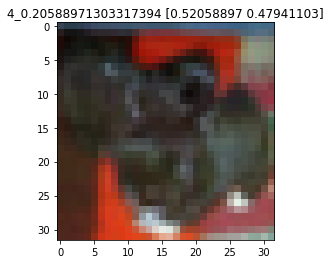

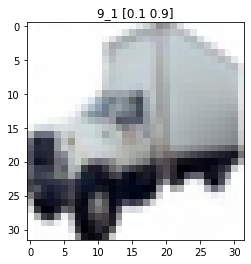

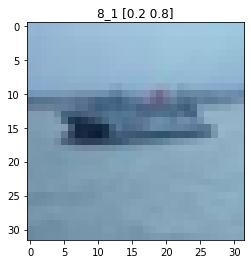

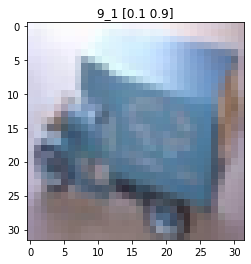

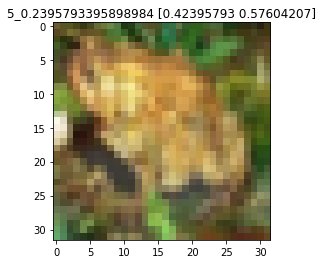

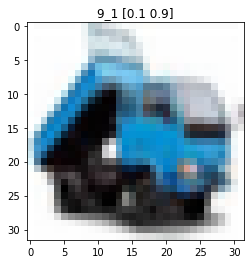

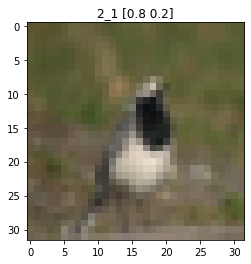

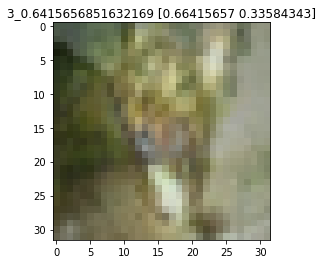

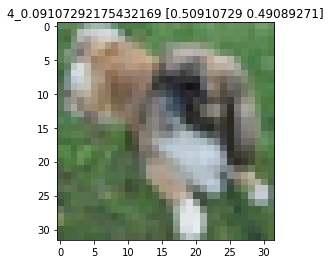

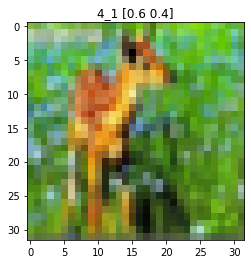

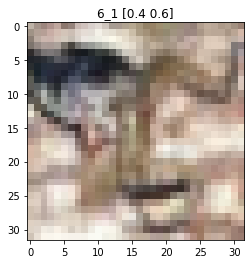

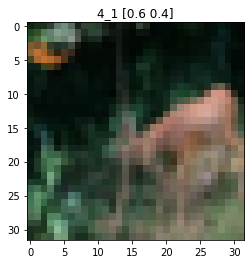

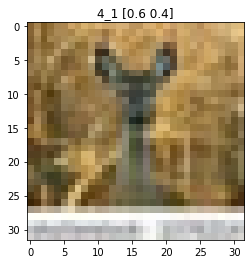

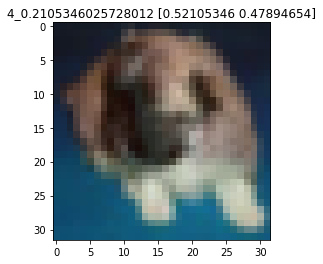

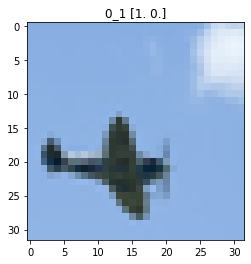

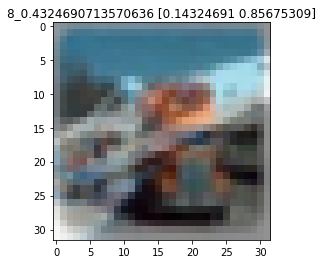

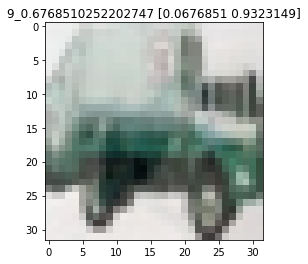

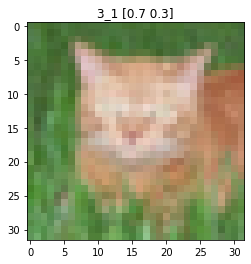

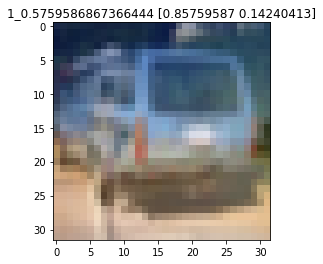

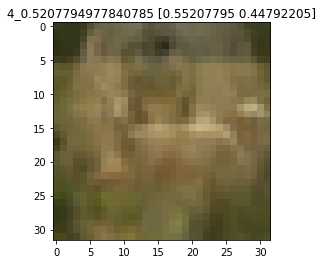

In [13]:
n_disp = 20
for i_disp in np.random.randint(0, len(train_images), size=n_disp):
    plt.imshow(train_images[i_disp] / 255.)
    plt.title((train_original_labels[i_disp] + " " + str(train_probs[i_disp])))
    plt.show()

In [14]:
!pwd

/Users/mburhanpurkar
